In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**READING CSV FILE**

In [7]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Road_Safety.csv",encoding='latin1')

<ipython-input-7-d7ee39296a8e>:1: DtypeWarning: Columns (0,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Road_Safety.csv",encoding='latin1')


In [8]:
df.head()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  2020000000000.0               528218.0                180407.0  -0.153842   
1  2020000000000.0               530219.0                172463.0  -0.127949   
2  2020000000000.0               530222.0                182543.0  -0.124193   
3  2020000000000.0               525531.0                184605.0  -0.191044   
4  2020000000000.0               524920.0                184004.0  -0.200064   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.508057             1                  3                   2   
1  51.436208             1                  3                   2   
2  51.526795             1                  3                   2   
3  51.546387             1                  2                   1   
4  51.541121             1                  3                   2   

   Number_of_Casualties        Date  ...  Pedestrian_Crossing-Human_Control  \
0                     3  18/02/2019  ...                                  0   
1                     1  15/01/2019  ...                                 -1   
2                     1    1/1/2019  ...                                  0   
3                     1    1/1/2019  ...                                  0   
4                     2    1/1/2019  ...                                  0   

  Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                       5                 1   
1                                      -1                 4   
2                                       0                 4   
3                                       0                 4   
4                                       0                 4   

  Weather_Conditions  Road_Surface_Conditions  Special_Conditions_at_Site  \
0                  1                        1                           0   
1                  1                        1                           0   
2                  1                        1                           0   
3                  1                        1                           0   
4                  1                        1                           0   

   Carriageway_Hazards  Urban_or_Rural_Area  \
0                    0                    1   
1                    0                    1   
2                    0                    1   
3                    0                    1   
4                    0                    1   

   Did_Police_Officer_Attend_Scene_of_Accident  LSOA_of_Accident_Location  
0                                            3                  E01004762  
1                                            3                  E01003117  
2                                            1                  E01000943  
3                                            1                  E01000973  
4                                            1                  E01000546  

[5 rows x 32 columns]

**DATA CLEANING**

In [9]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [10]:
df.shape

(117536, 32)

In [11]:
# Check for missing values
print(df.isnull().sum())

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [12]:
df.dropna()

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2020000000000.0               528218.0                180407.0   
1       2020000000000.0               530219.0                172463.0   
2       2020000000000.0               530222.0                182543.0   
3       2020000000000.0               525531.0                184605.0   
4       2020000000000.0               524920.0                184004.0   
...                 ...                    ...                     ...   
111847    201963DF02919               326180.0                316370.0   
111848    201963DF03019               309990.0                271620.0   
111849    201963DF03319               297250.0                290970.0   
111850    201963DF03419               286940.0                245670.0   
111851    201963DF03619               293850.0                225950.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.153842  51.508057             1                  3   
1       -0.127949  51.436208             1                  3   
2       -0.124193  51.526795             1                  3   
3       -0.191044  51.546387             1                  2   
4       -0.200064  51.541121             1                  3   
...           ...        ...           ...                ...   
111847  -3.094841  52.739912            63                  1   
111848  -3.322442  52.335266            63                  1   
111849  -3.515306  52.506924            63                  1   
111850  -3.651922  52.097790            63                  1   
111851  -3.544971  51.921926            63                  1   

        Number_of_Vehicles  Number_of_Casualties        Date  ...  \
0                        2                     3  18/02/2019  ...   
1                        2                     1  15/01/2019  ...   
2                        2                     1    1/1/2019  ...   
3                        1                     1    1/1/2019  ...   
4                        2                     2    1/1/2019  ...   
...                    ...                   ...         ...  ...   
111847                   3                     2  17/08/2019  ...   
111848                   3                     2  25/08/2019  ...   
111849                   1                     1  22/09/2019  ...   
111850                   1                     2   5/10/2019  ...   
111851                   2                     1   3/11/2019  ...   

        Pedestrian_Crossing-Human_Control  \
0                                       0   
1                                      -1   
2                                       0   
3                                       0   
4                                       0   
...                                   ...   
111847                                  0   
111848                                  0   
111849                                  0   
111850                                  0   
111851                                  0   

       Pedestrian_Crossing-Physical_Facilities  Light_Conditions  \
0                                            5                 1   
1                                           -1                 4   
2                                            0                 4   
3                                            0                 4   
4                                            0                 4   
...                                        ...               ...   
111847                                       0                 1   
111848                                       0                 1   
111849                                       0                 4   
111850                                       0                 1   
111851                                       0                 1   

       Weather_Conditions  Road_Surface_Conditions  \
0                       1                        1   
1                       1                   

In [13]:
# Display summary statistics
print(df.describe())

       Location_Easting_OSGR  Location_Northing_OSGR      Longitude  \
count          117508.000000            1.175080e+05  117508.000000   
mean           452403.224717            2.786857e+05      -1.249439   
std             95033.024831            1.509356e+05       1.392356   
min             64084.000000            1.081400e+04      -7.525273   
25%            388018.250000            1.755260e+05      -2.180604   
50%            459396.000000            2.184650e+05      -1.123331   
75%            529373.250000            3.848040e+05      -0.135499   
max            655244.000000            1.167366e+06       1.757476   

            Latitude   Police_Force  Accident_Severity  Number_of_Vehicles  \
count  117508.000000  117536.000000      117536.000000       117536.000000   
mean       52.395427      28.228160           2.772512            1.840976   
std         1.359522      24.622519           0.451610            0.708412   
min        49.917760       1.000000           1.

**HISTOGRAM PLOTS**

Skipping Accident_Index - Neither numeric nor categorical.


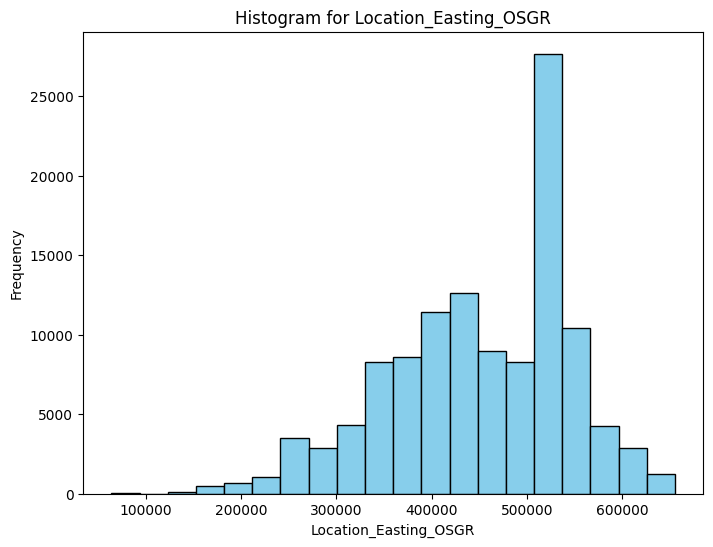

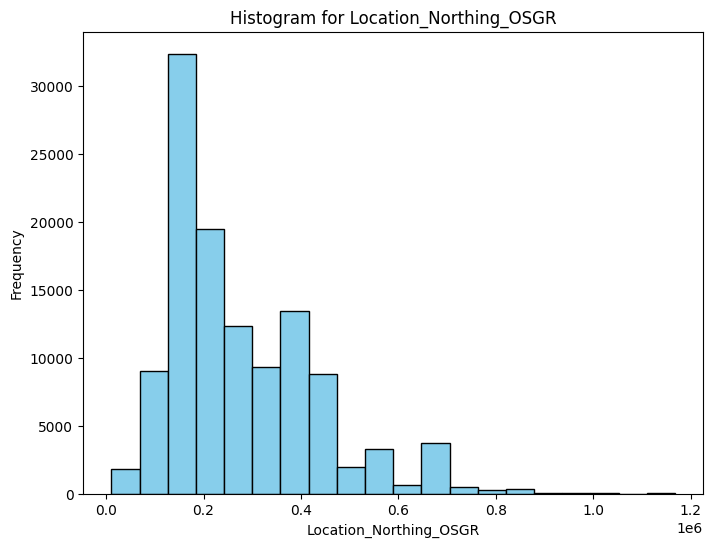

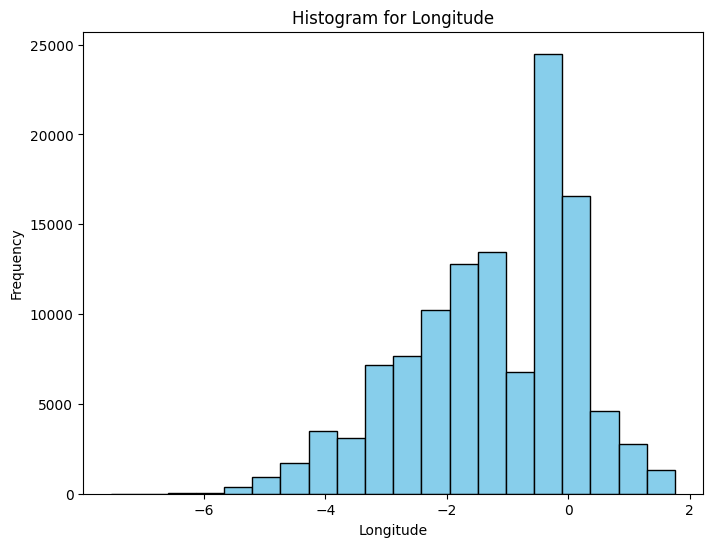

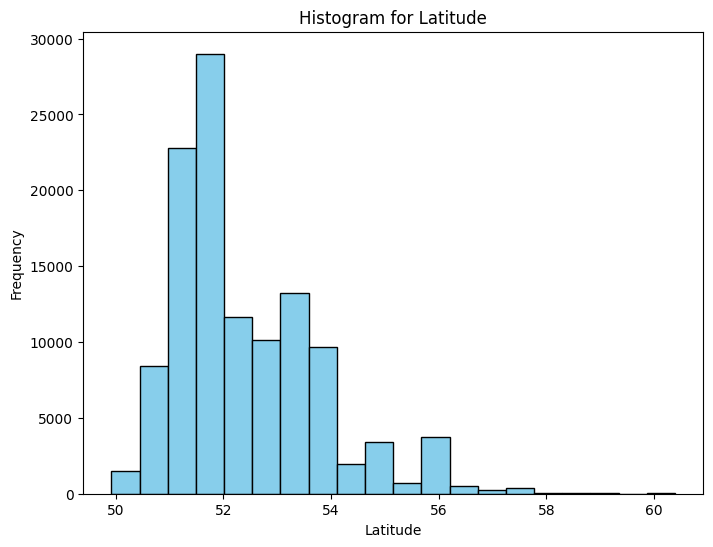

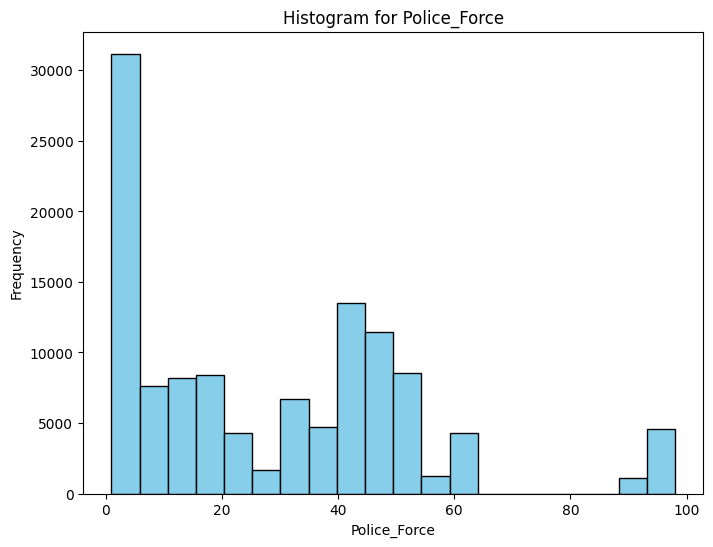

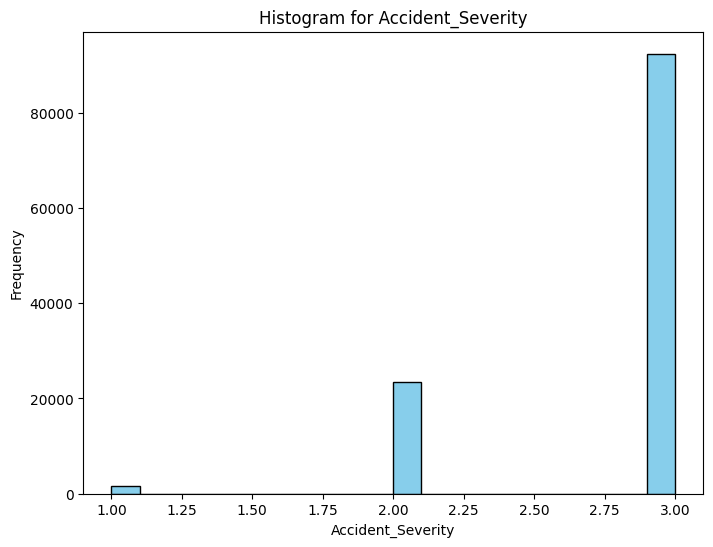

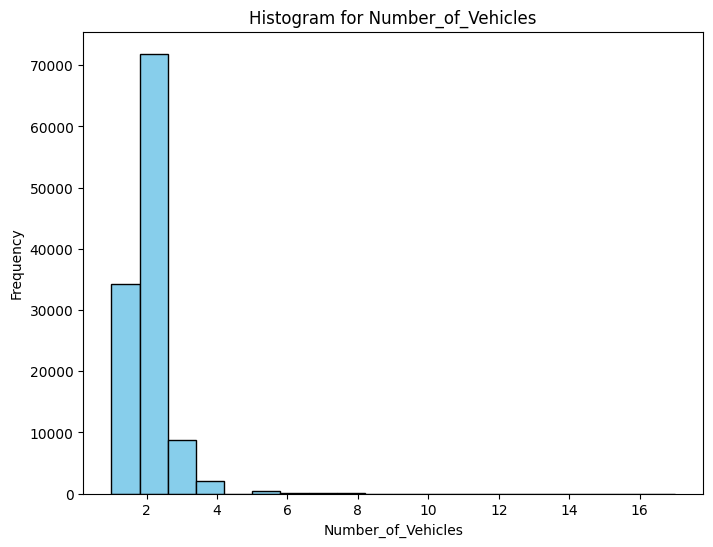

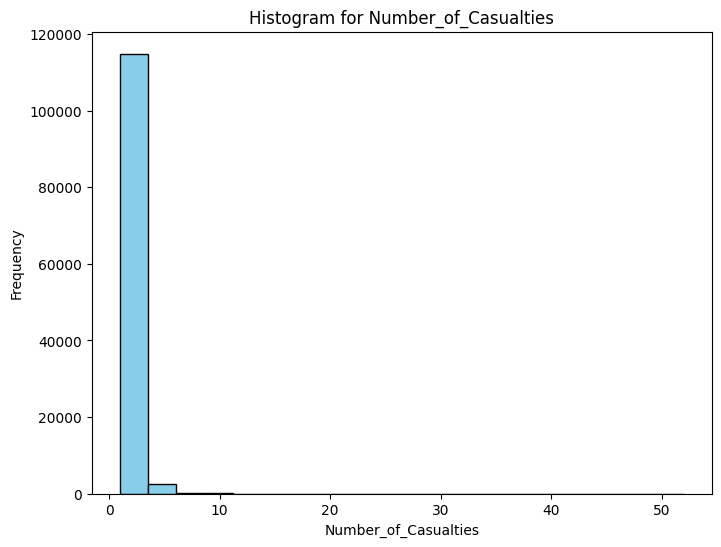

Skipping Date - Neither numeric nor categorical.


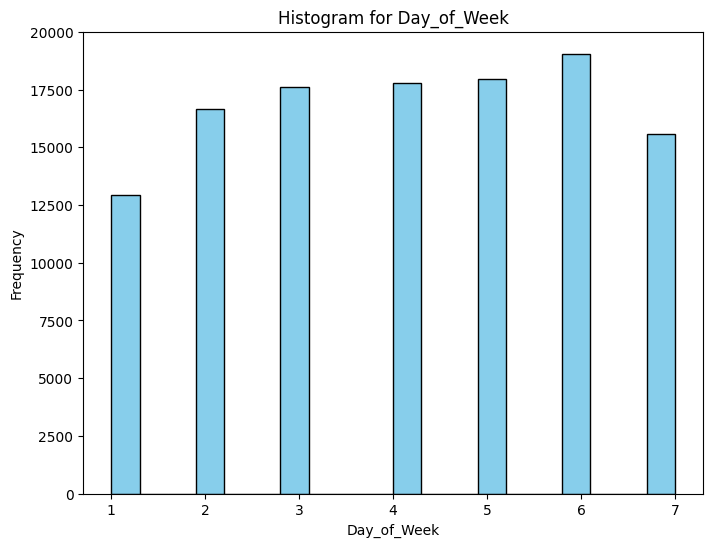

Skipping Time - Neither numeric nor categorical.


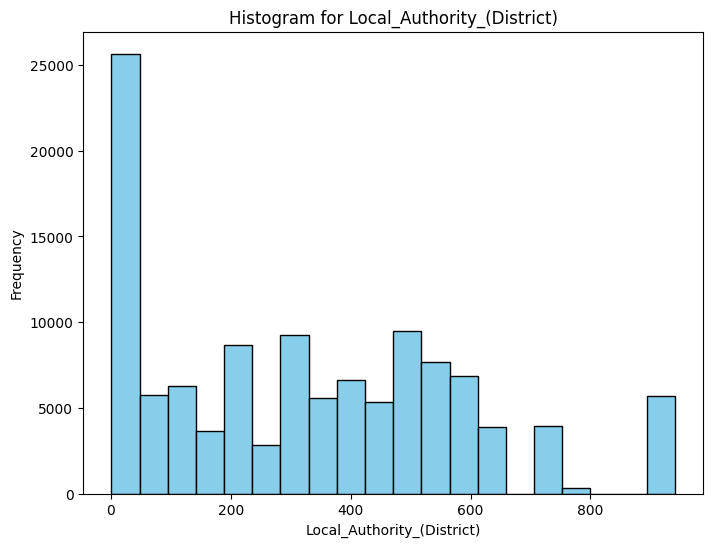

Skipping Local_Authority_(Highway) - Neither numeric nor categorical.


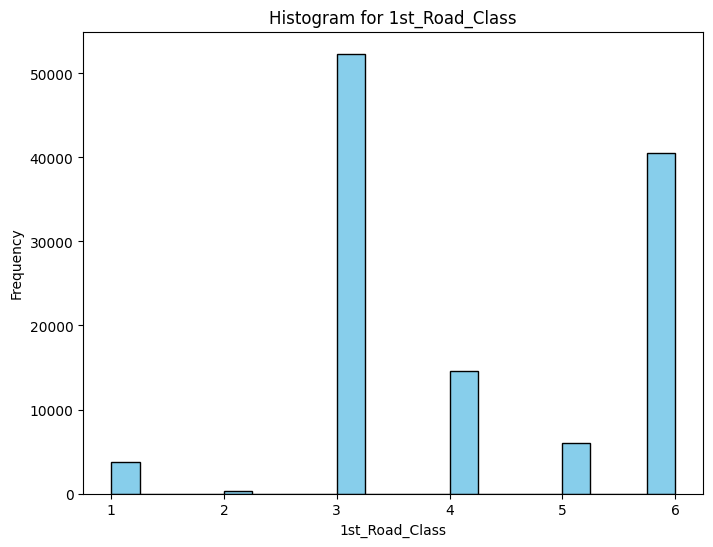

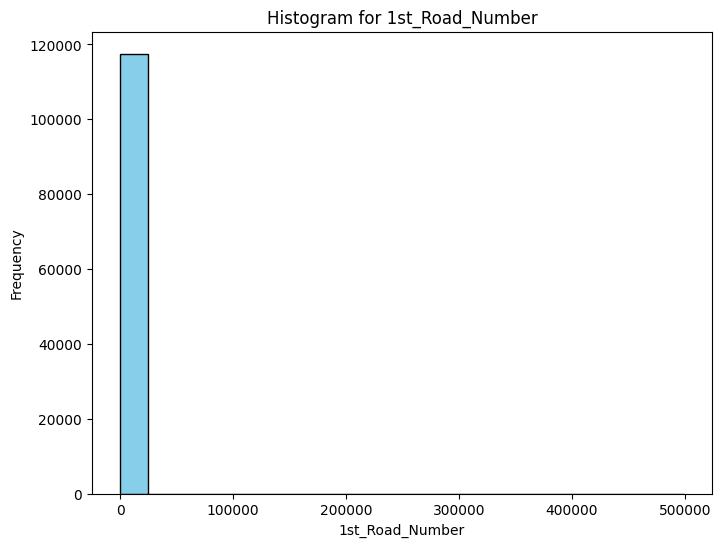

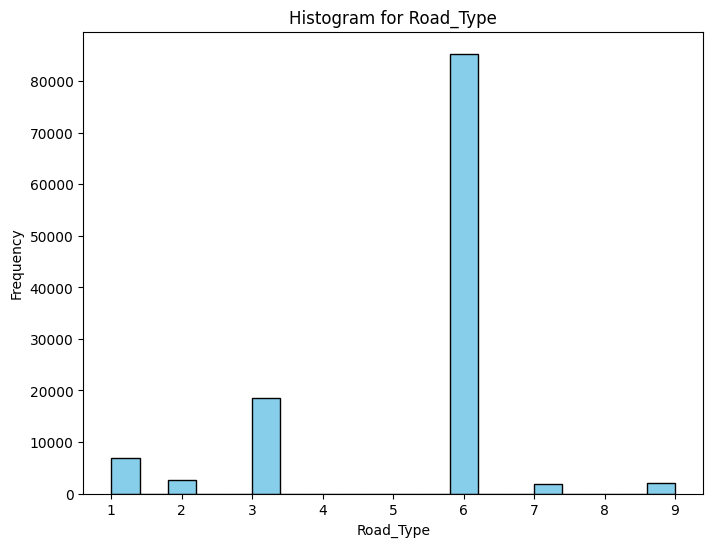

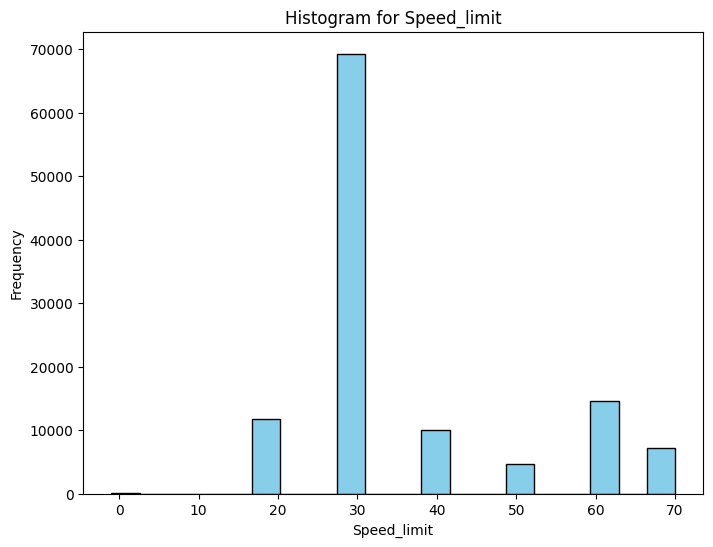

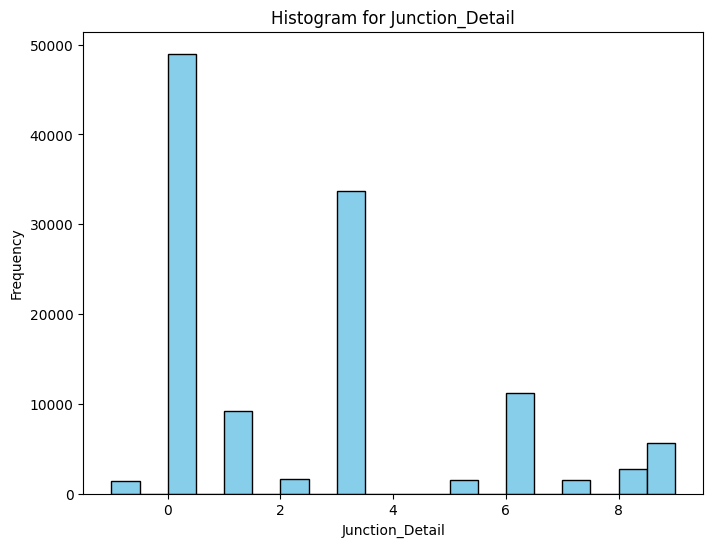

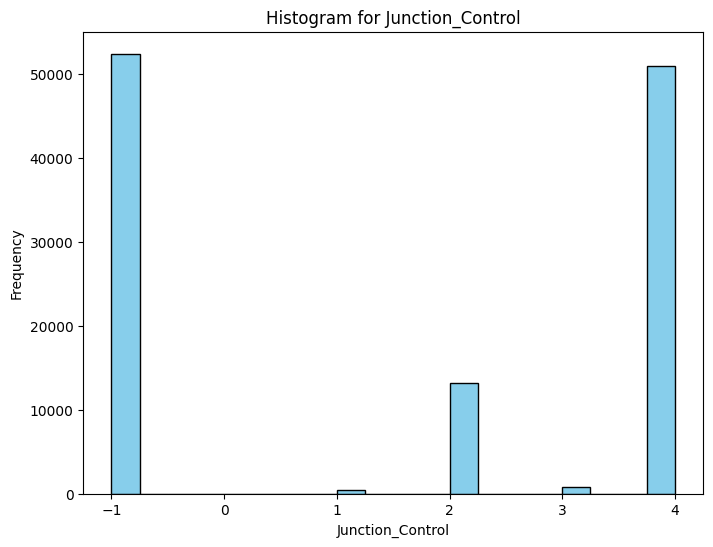

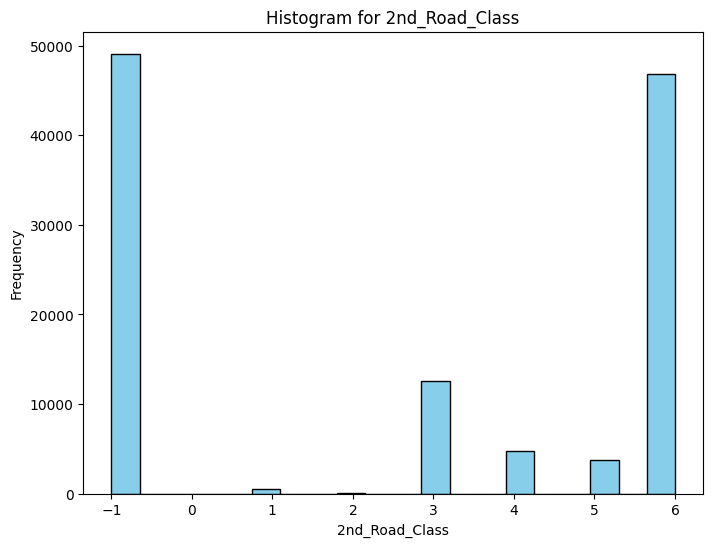

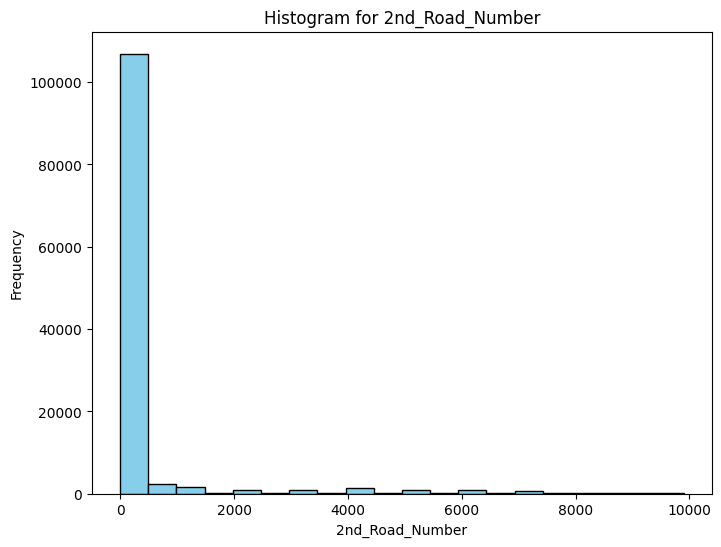

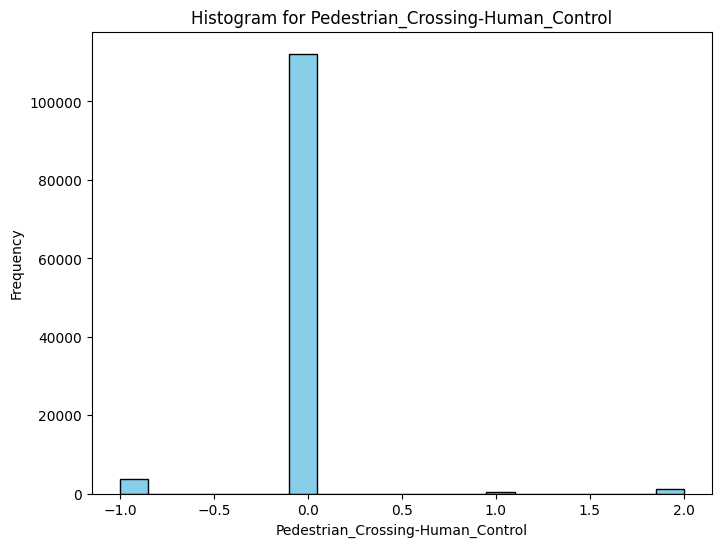

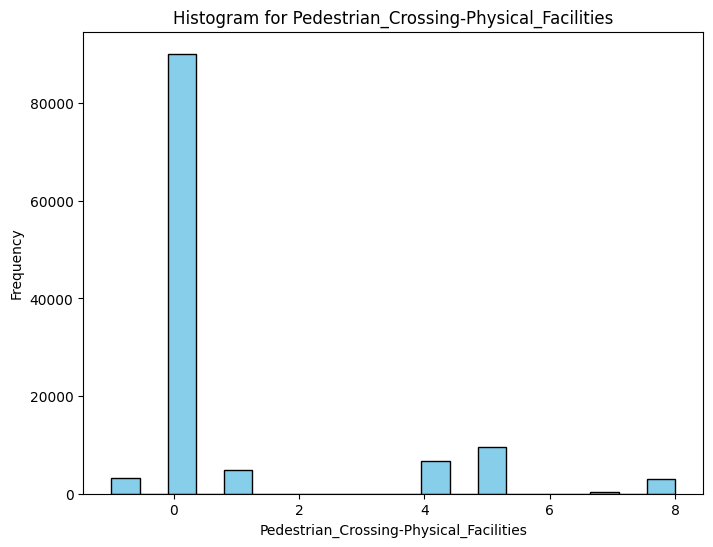

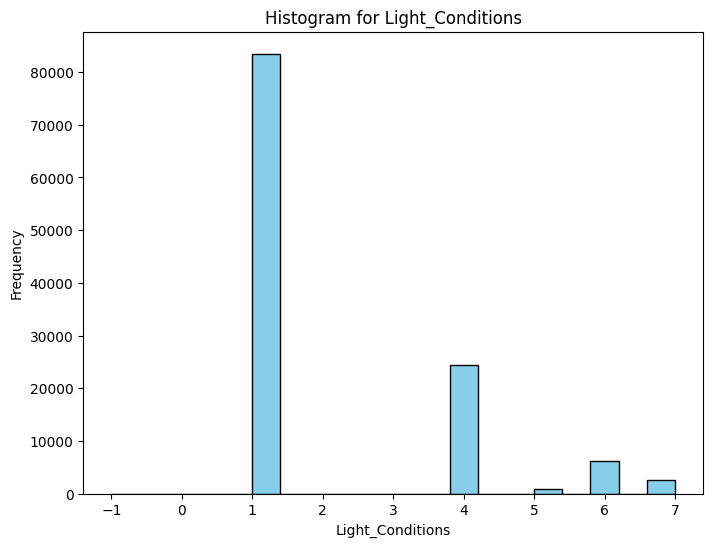

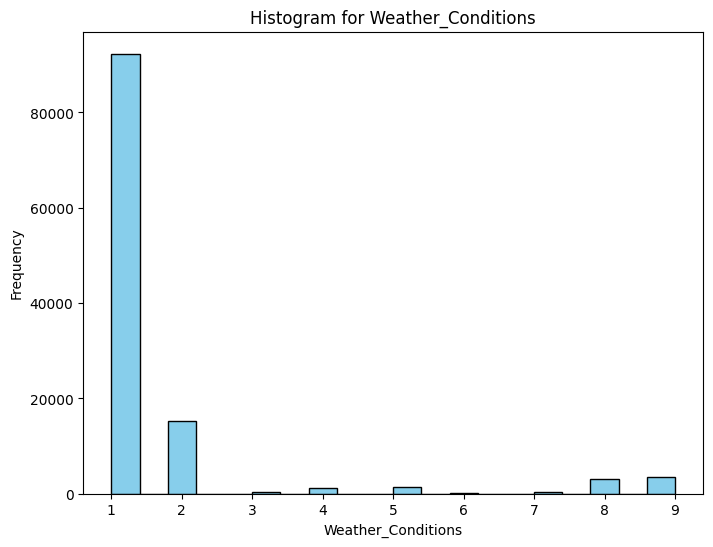

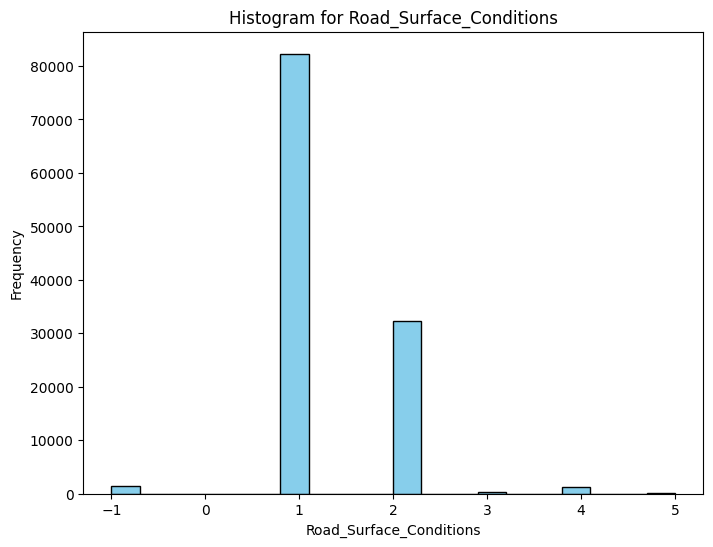

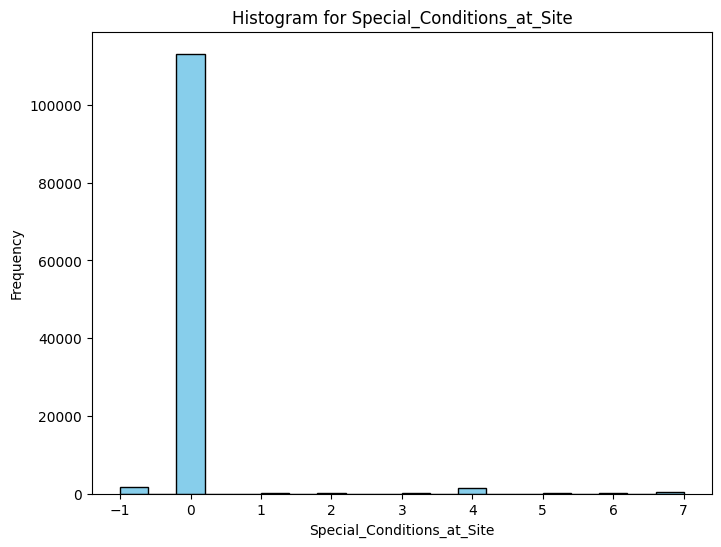

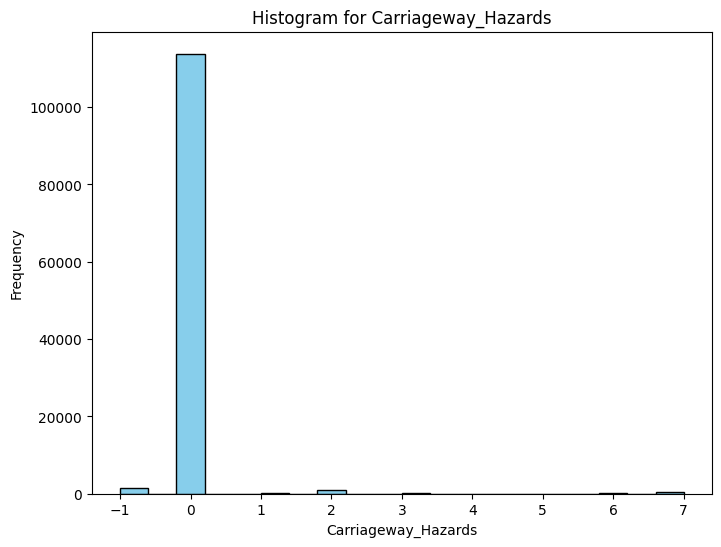

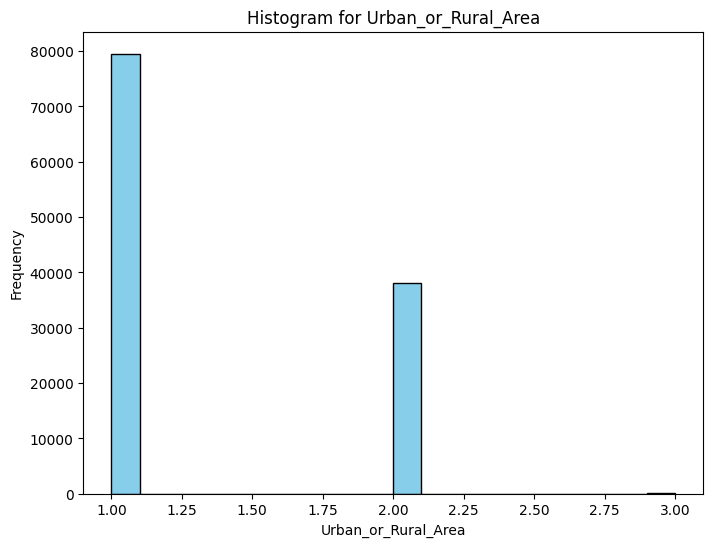

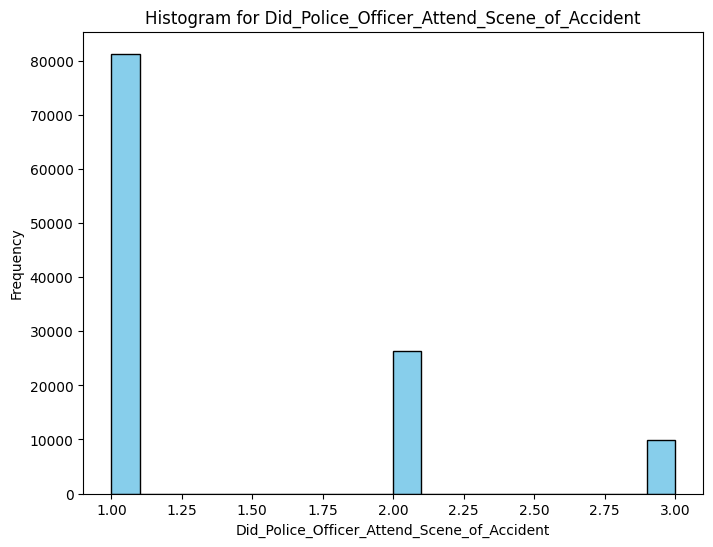

Skipping LSOA_of_Accident_Location - Neither numeric nor categorical.


In [14]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in df.columns:
    if column in numeric_columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Skipping {column} - Neither numeric nor categorical.")


**BOX PLOT**

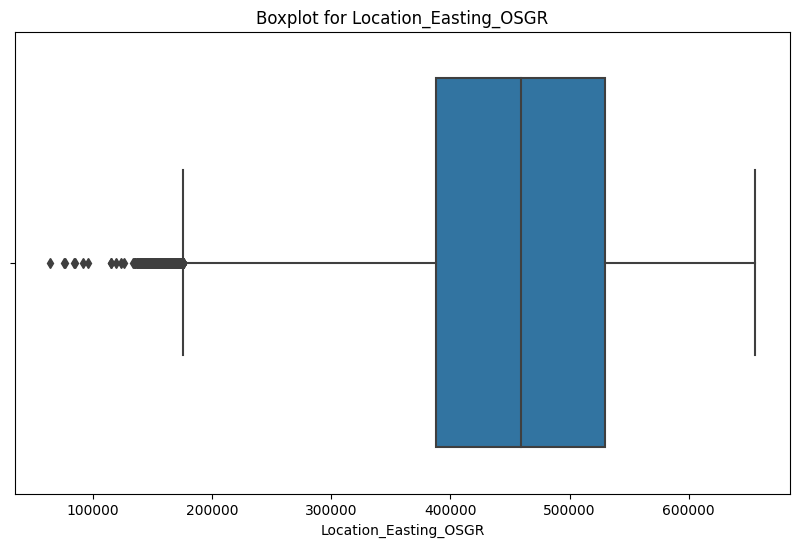

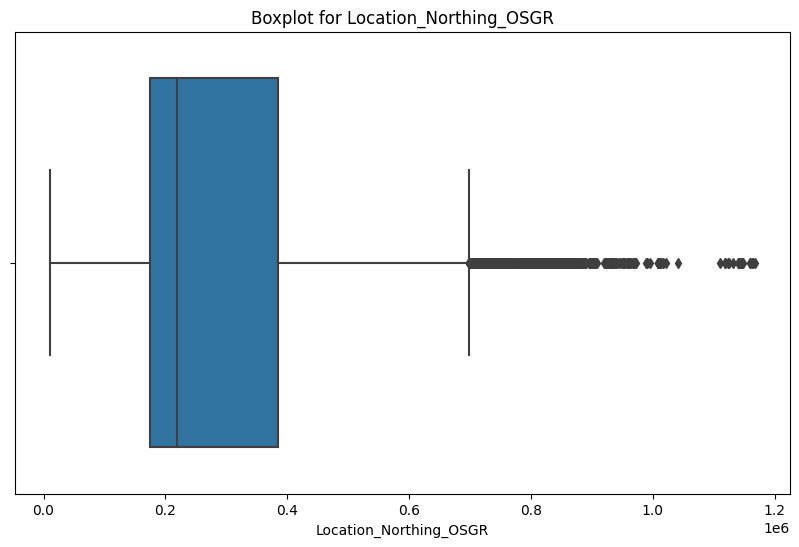

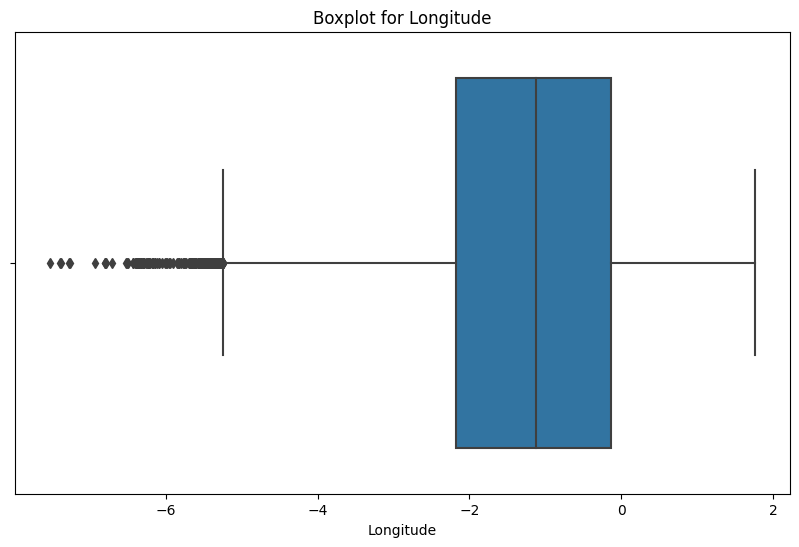

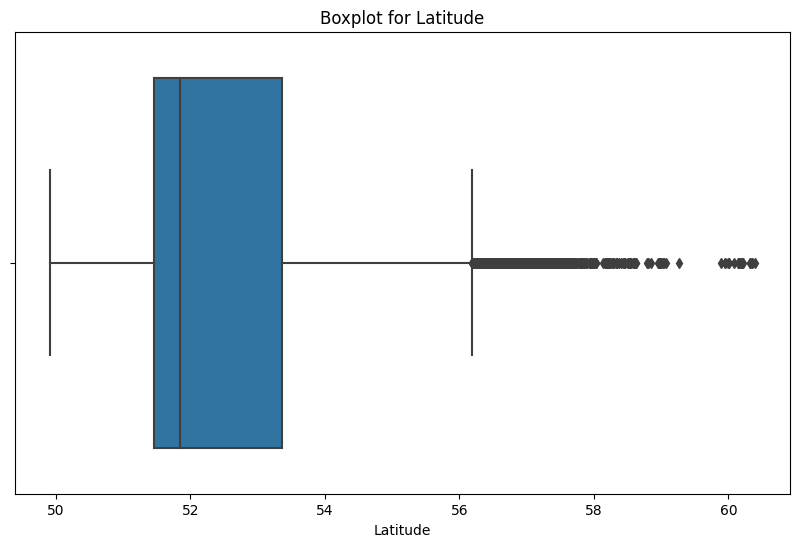

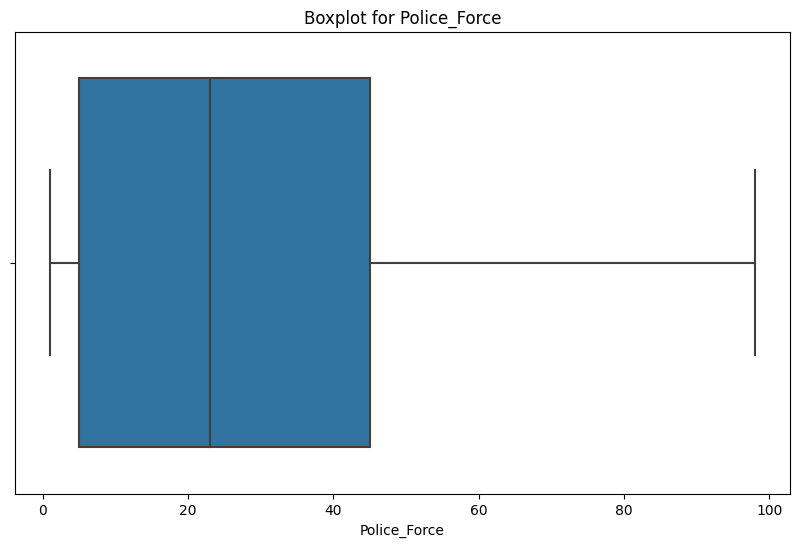

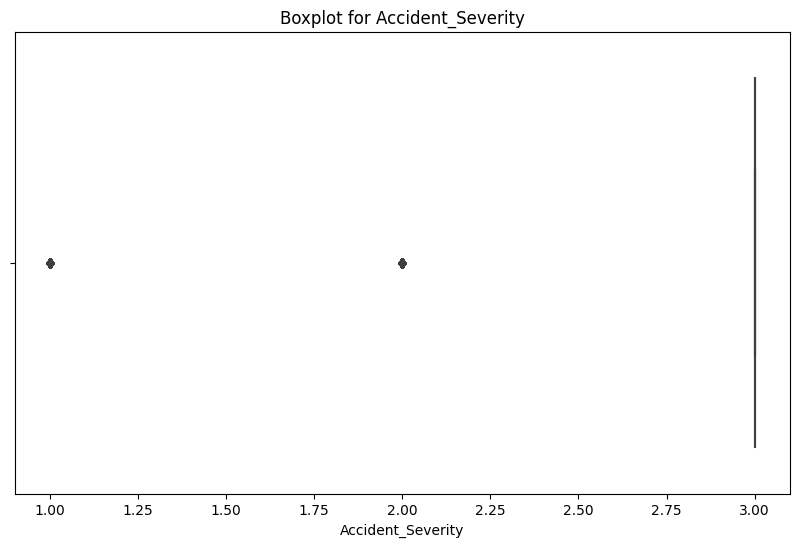

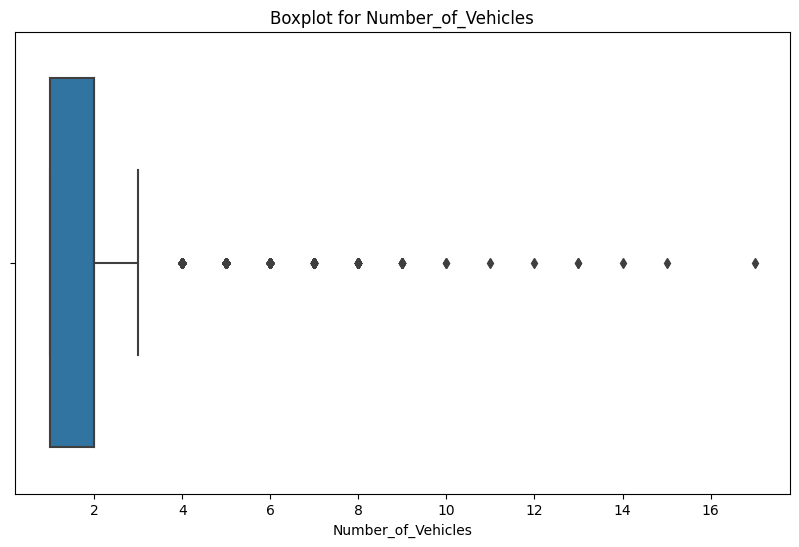

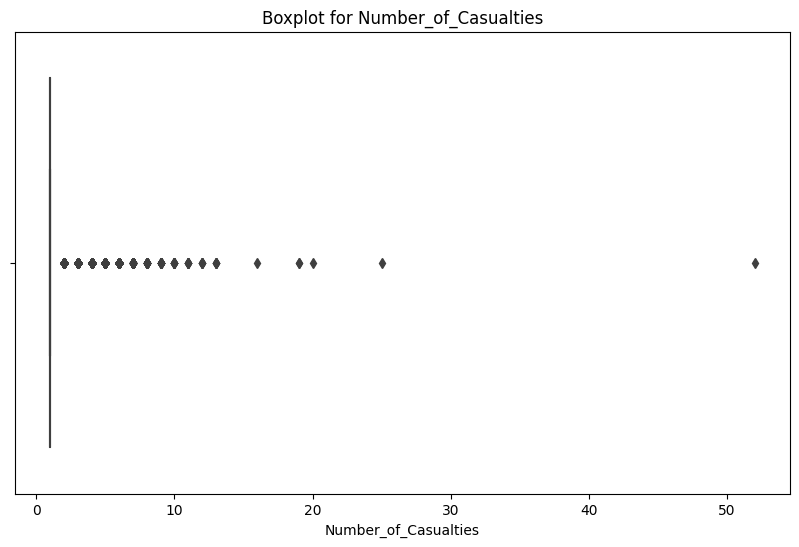

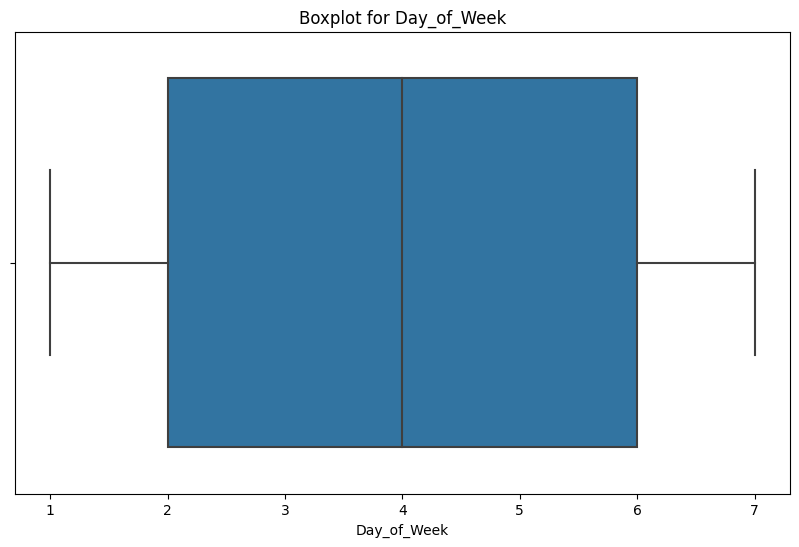

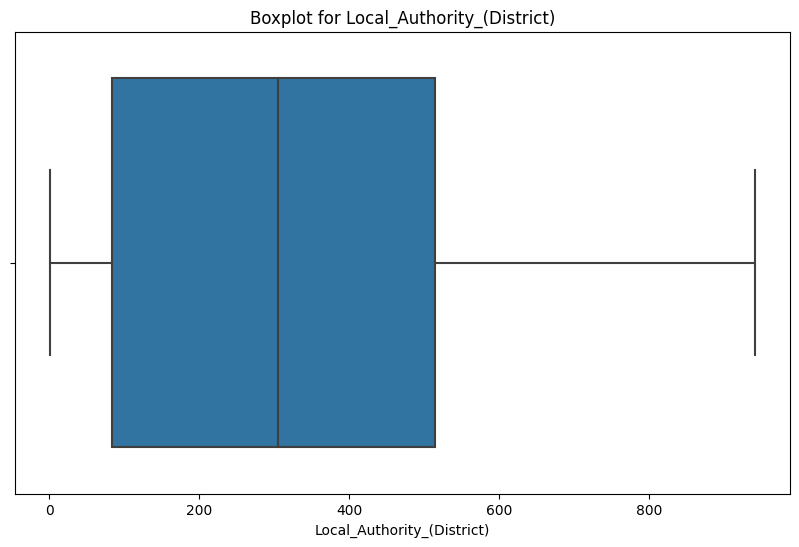

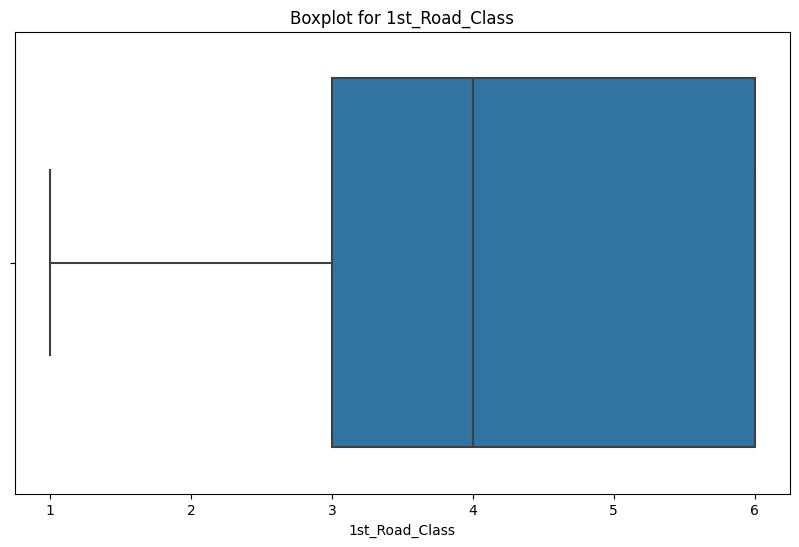

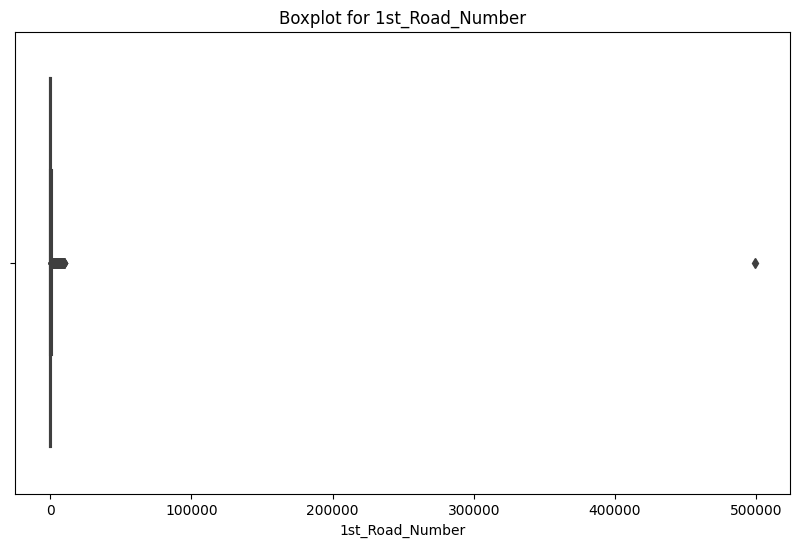

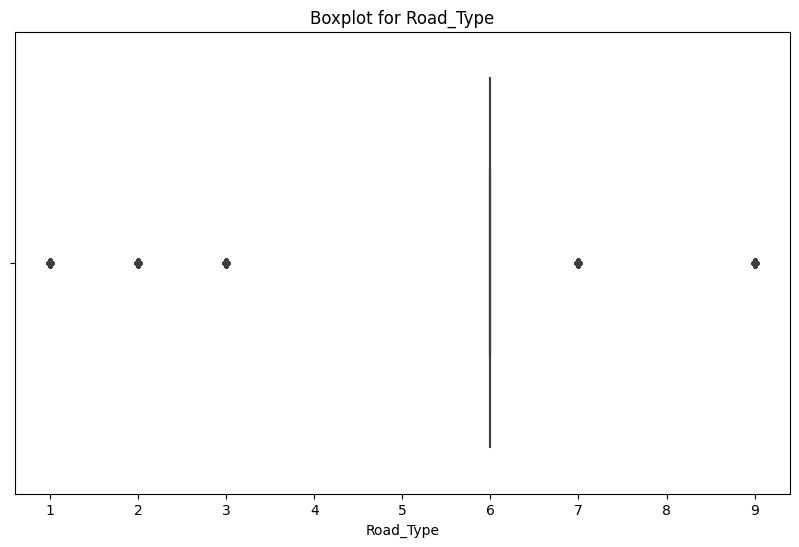

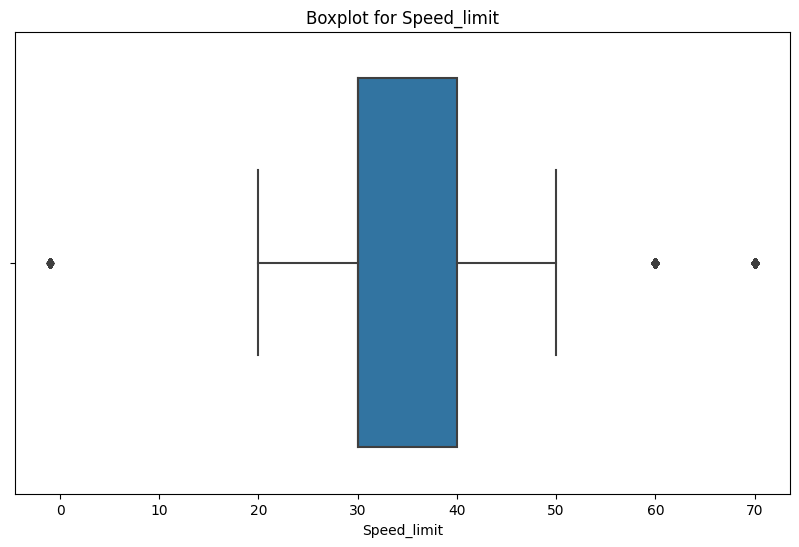

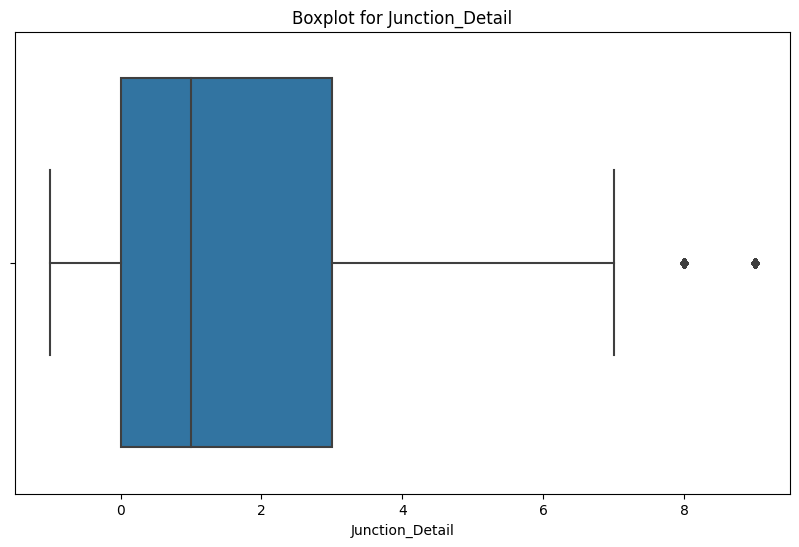

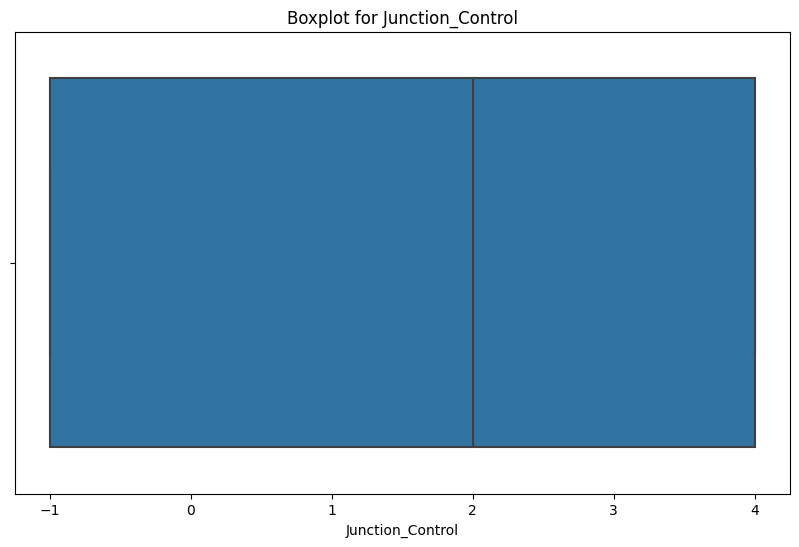

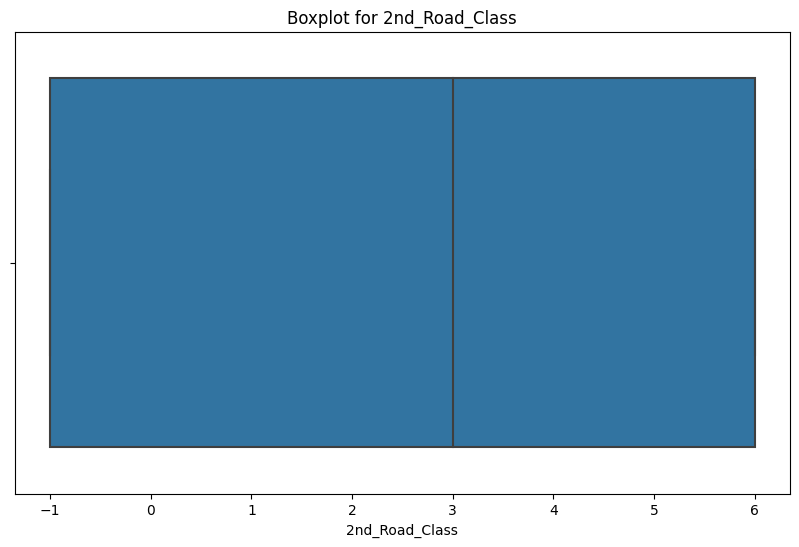

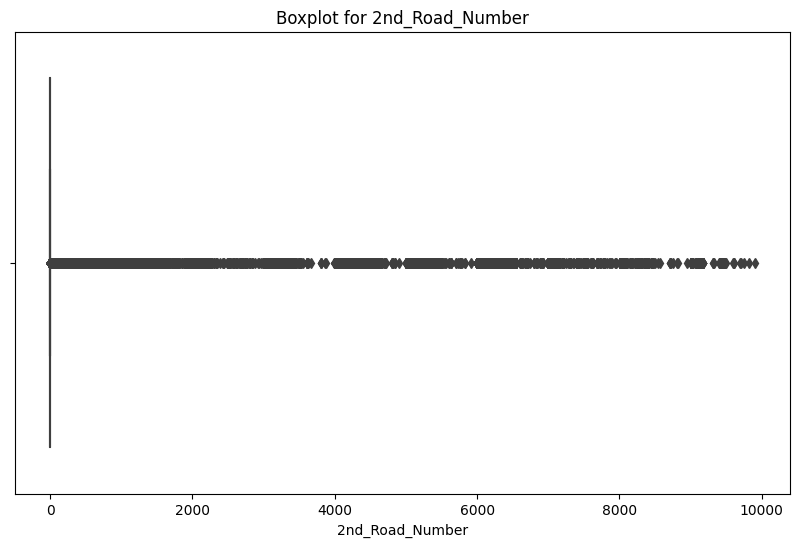

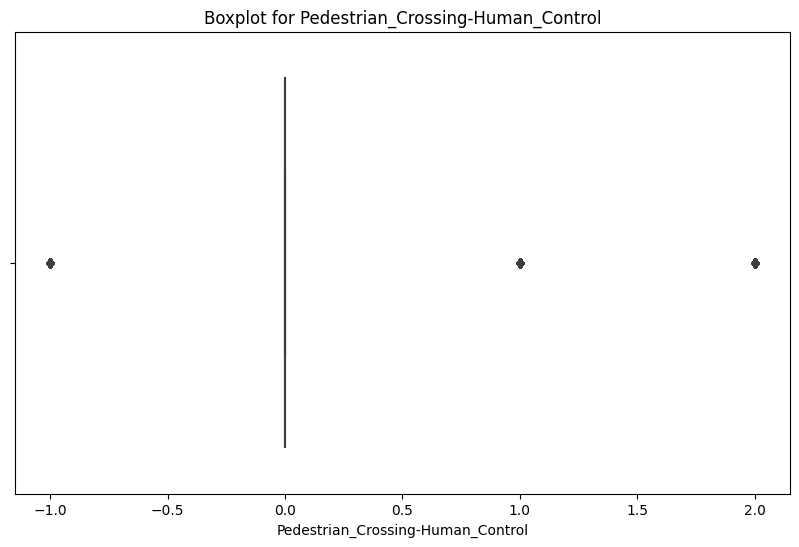

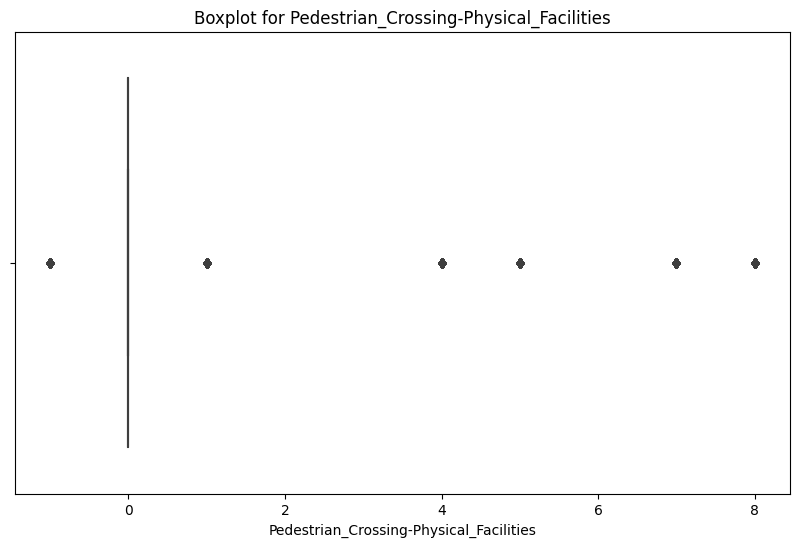

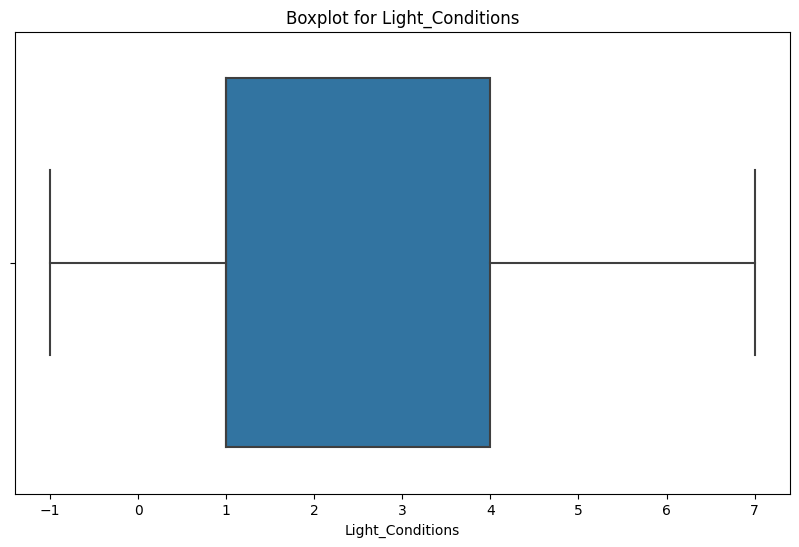

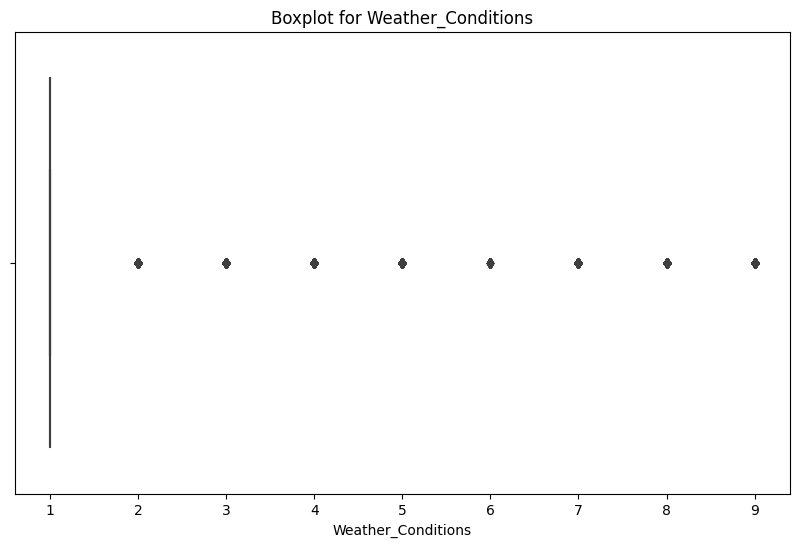

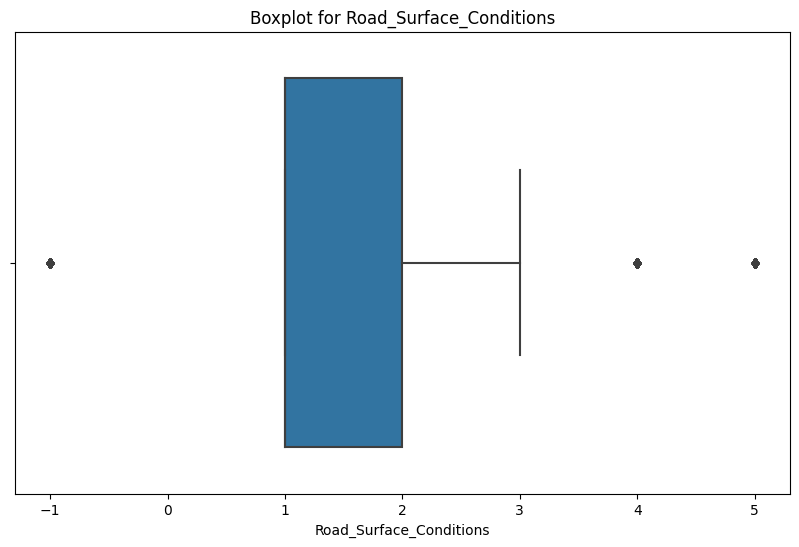

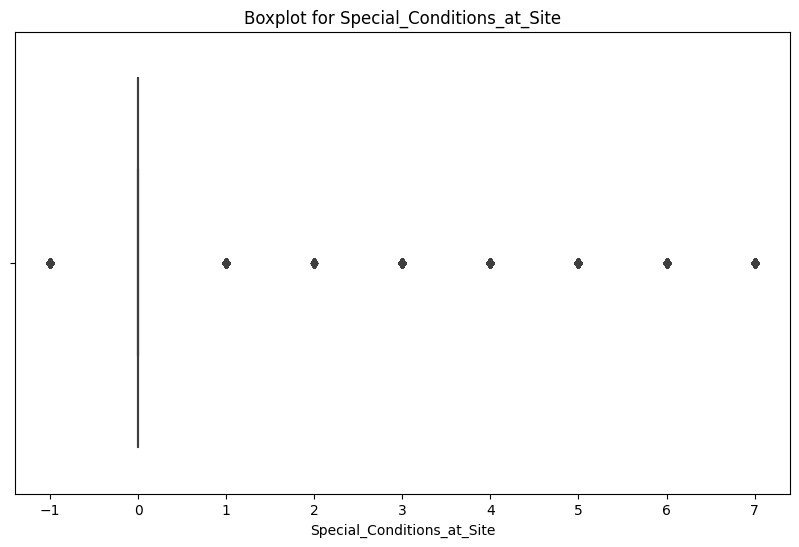

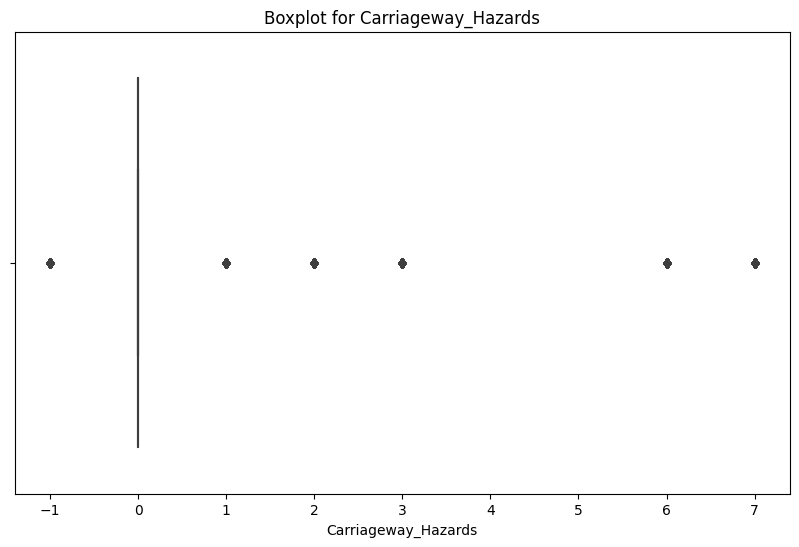

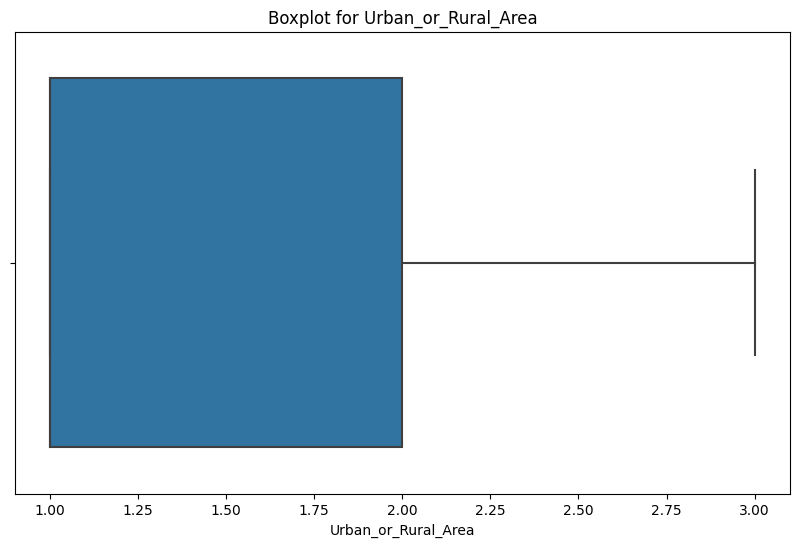

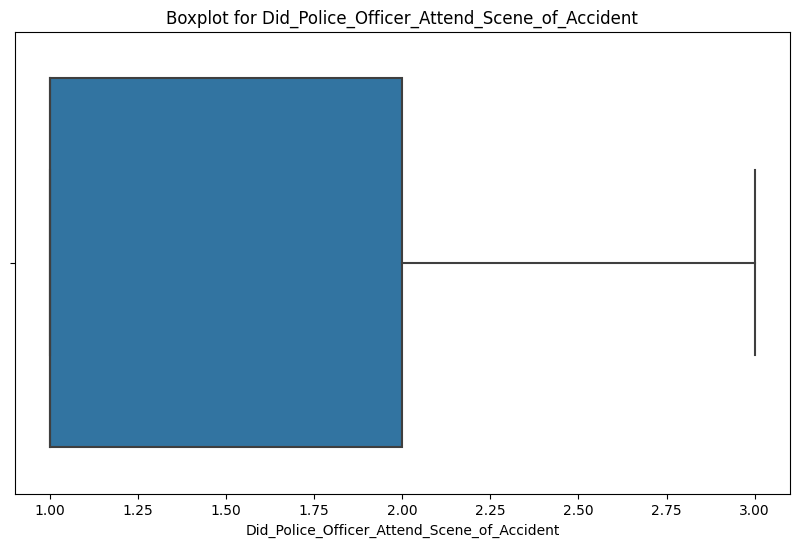

In [15]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [16]:
df.boxplot

<bound method boxplot_frame of          Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0       2020000000000.0               528218.0                180407.0   
1       2020000000000.0               530219.0                172463.0   
2       2020000000000.0               530222.0                182543.0   
3       2020000000000.0               525531.0                184605.0   
4       2020000000000.0               524920.0                184004.0   
...                 ...                    ...                     ...   
117531         2.02E+12               312635.0                573392.0   
117532         2.02E+12               337522.0                591682.0   
117533         2.02E+12               318544.0                567087.0   
117534         2.02E+12               336525.0                584226.0   
117535    201998QC01004               291367.0                608364.0   

        Longitude   Latitude  Police_Force  Accident_Severity  \
0       -0.1538

**PAIR PLOT**

<ipython-input-24-69ffb538e065>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

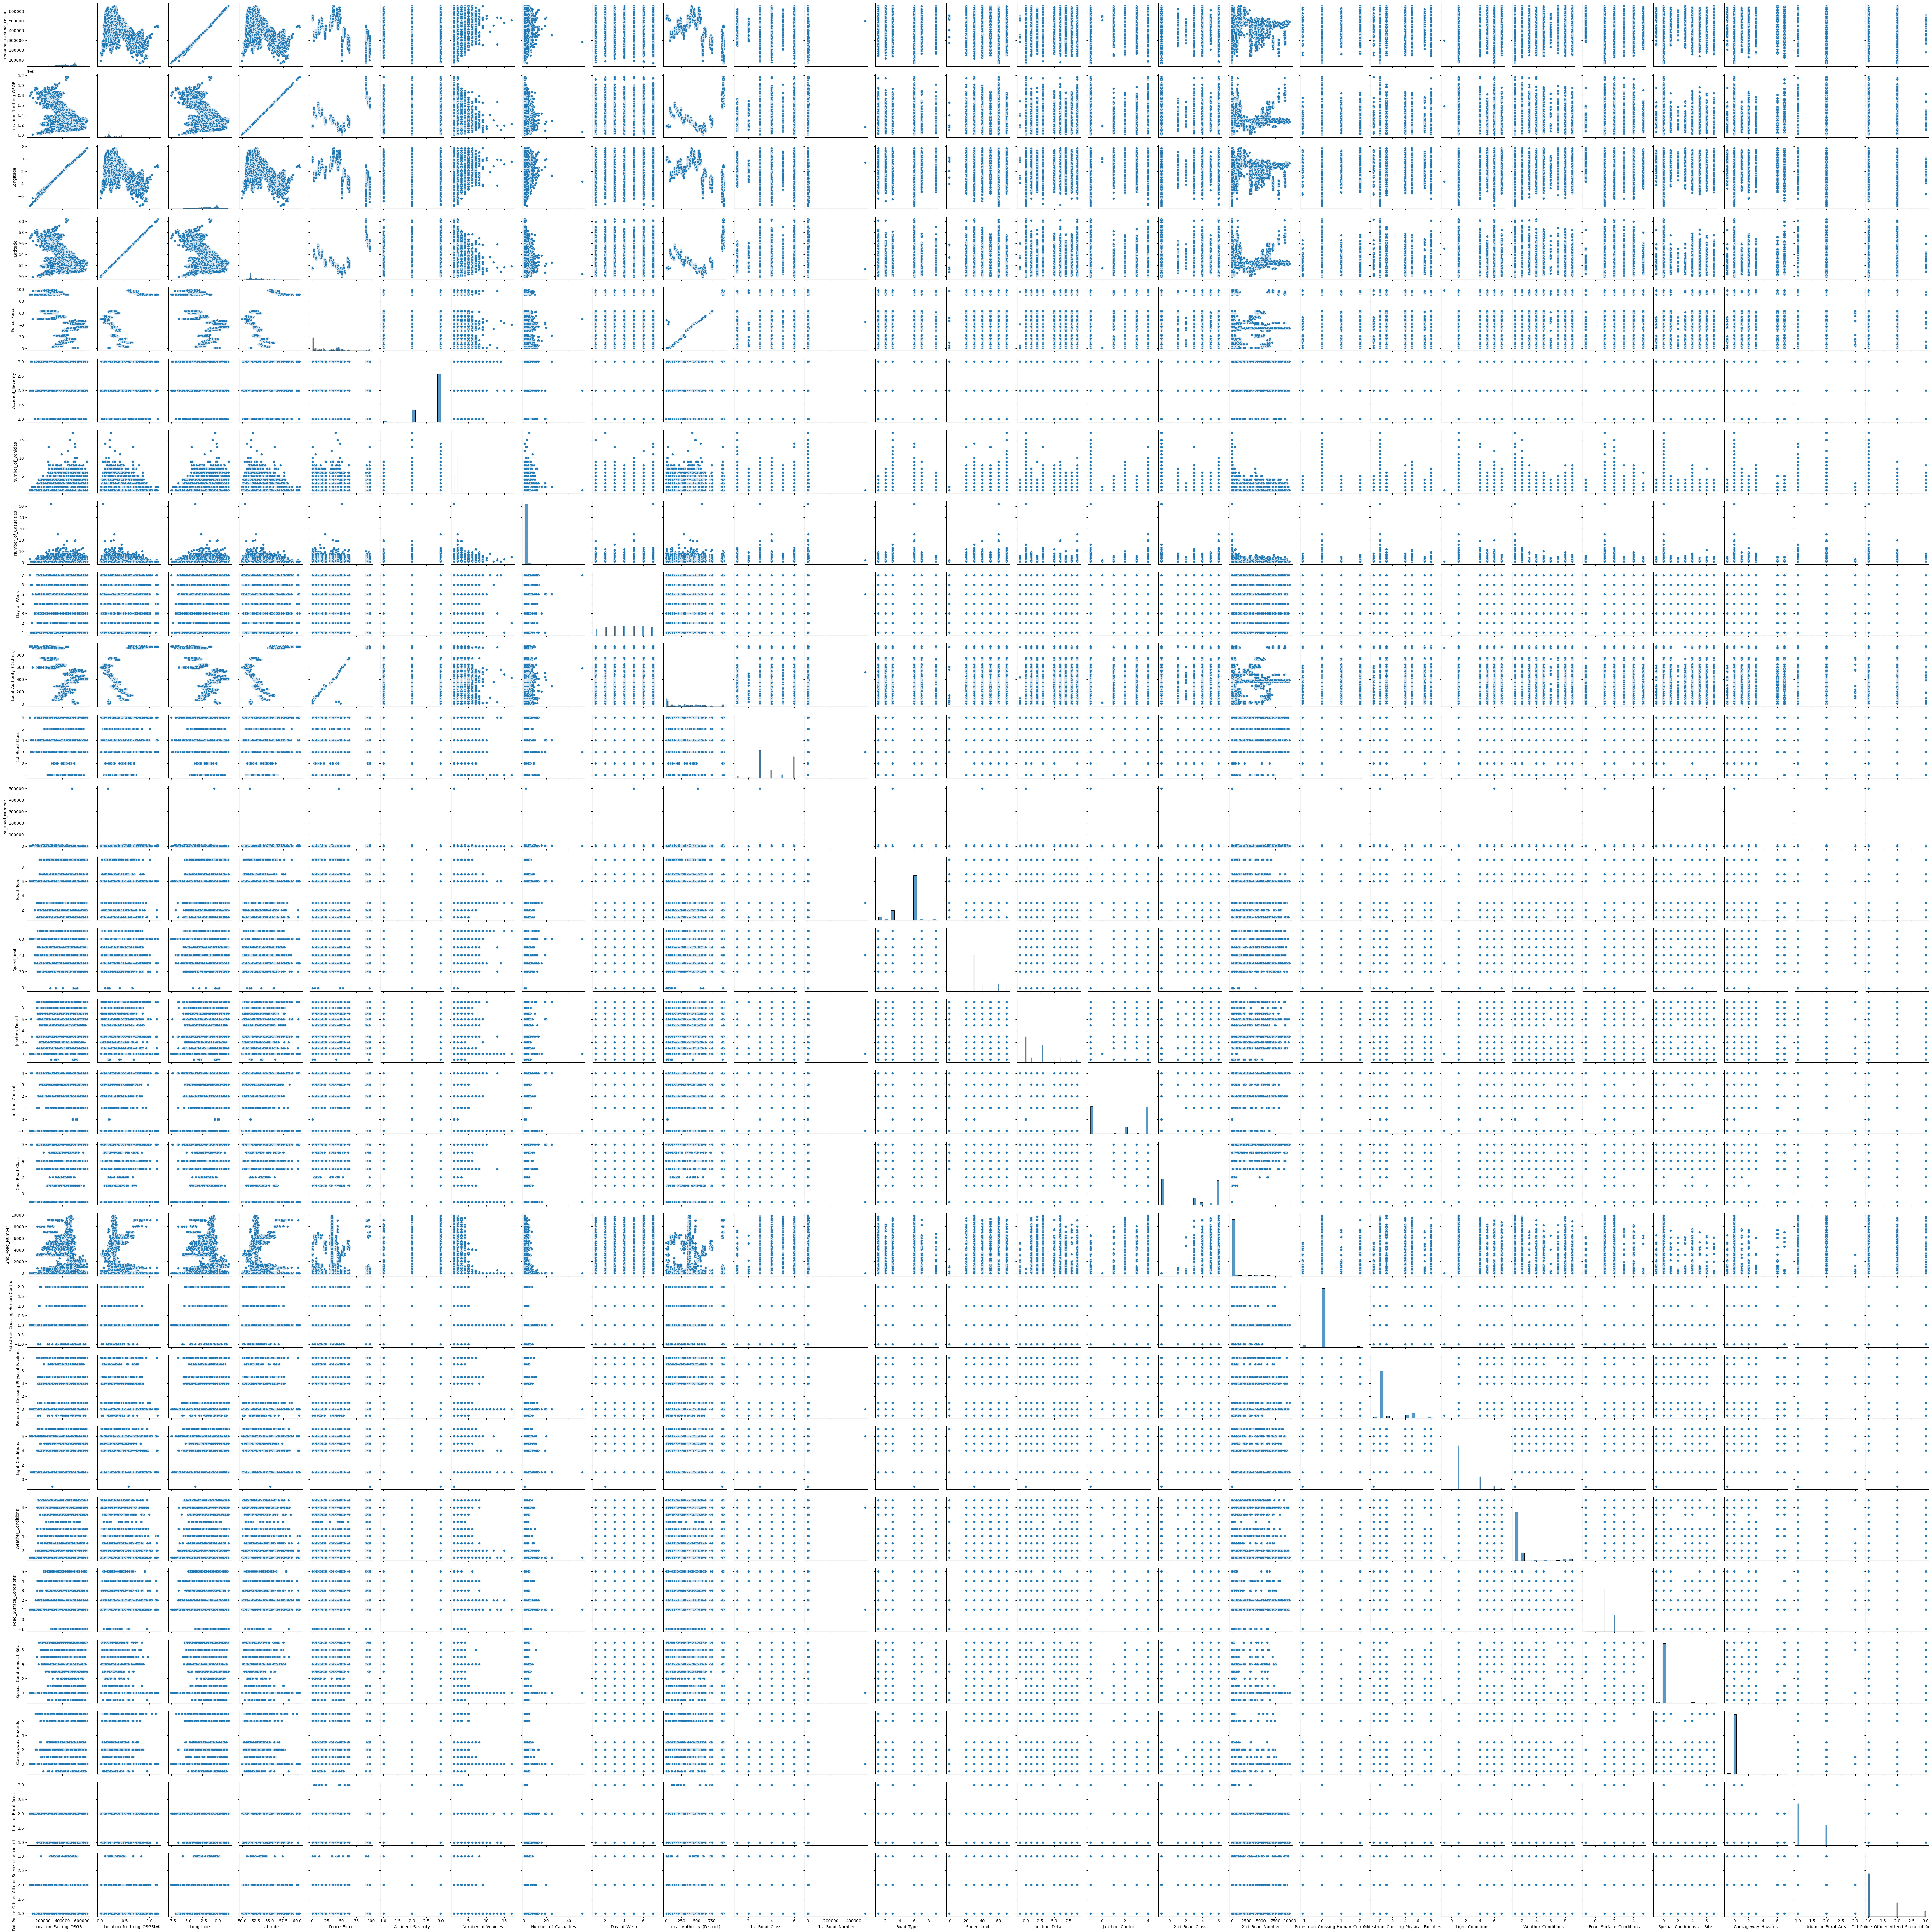

In [24]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Create scatter plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
sns.pairplot(df[numeric_columns])
plt.show()


**OBSERVATIONS**

This the pair plot and we can see there are so many patterns present.The data is so unclear. Data cleaning is required

**FINDING OUTLIERS**

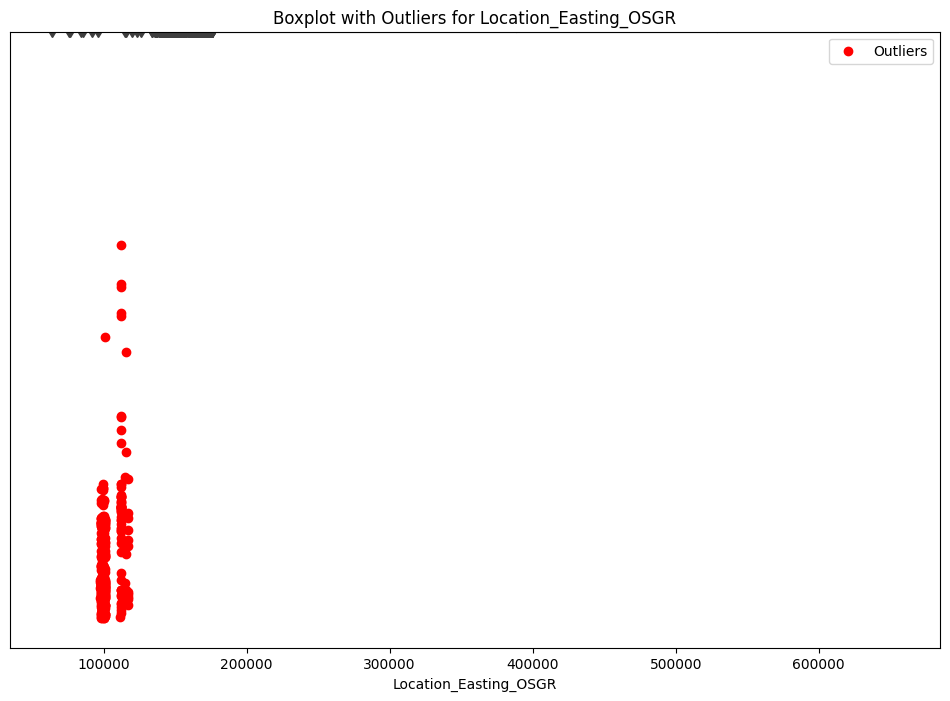

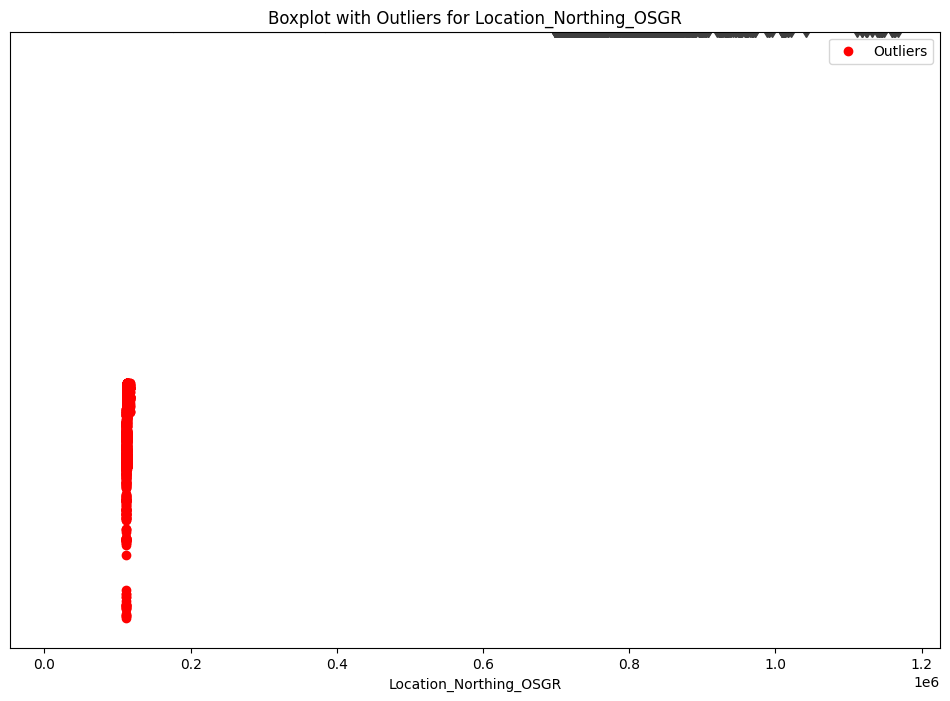

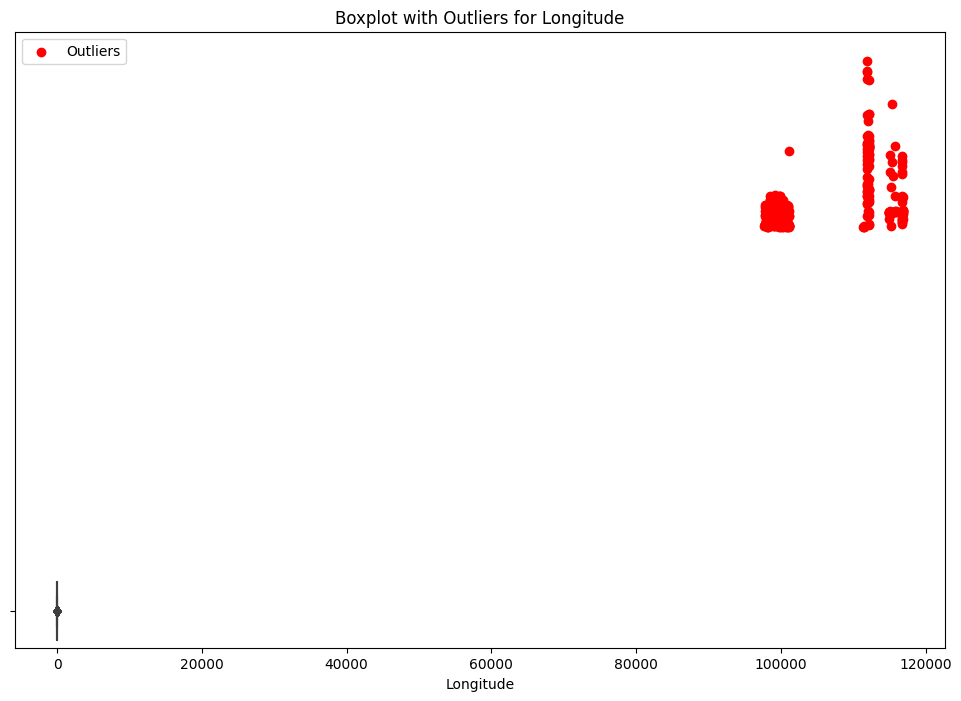

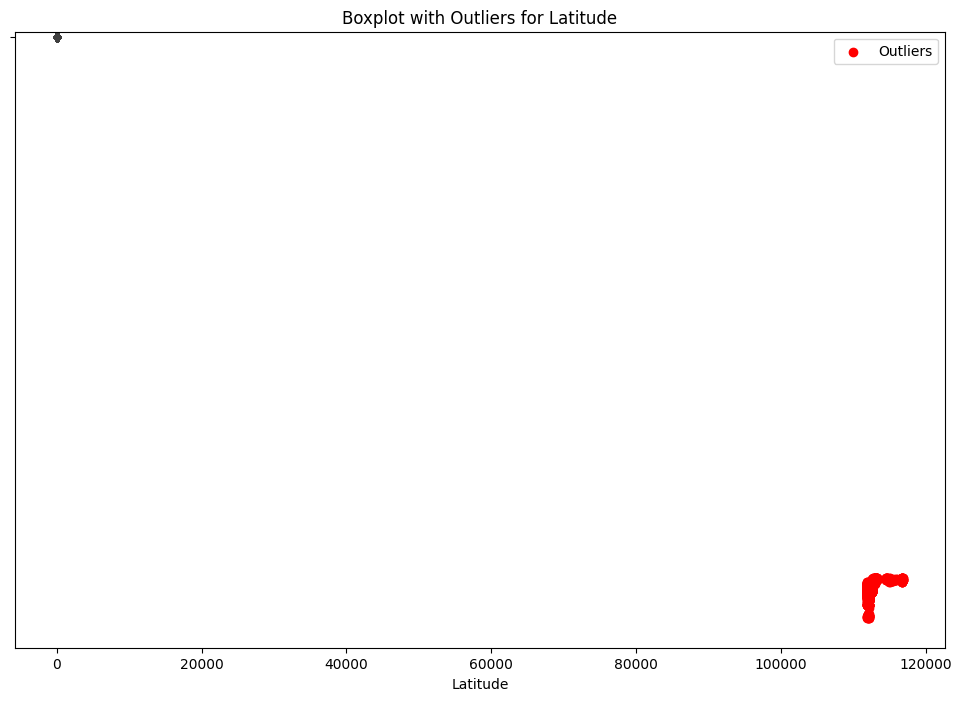

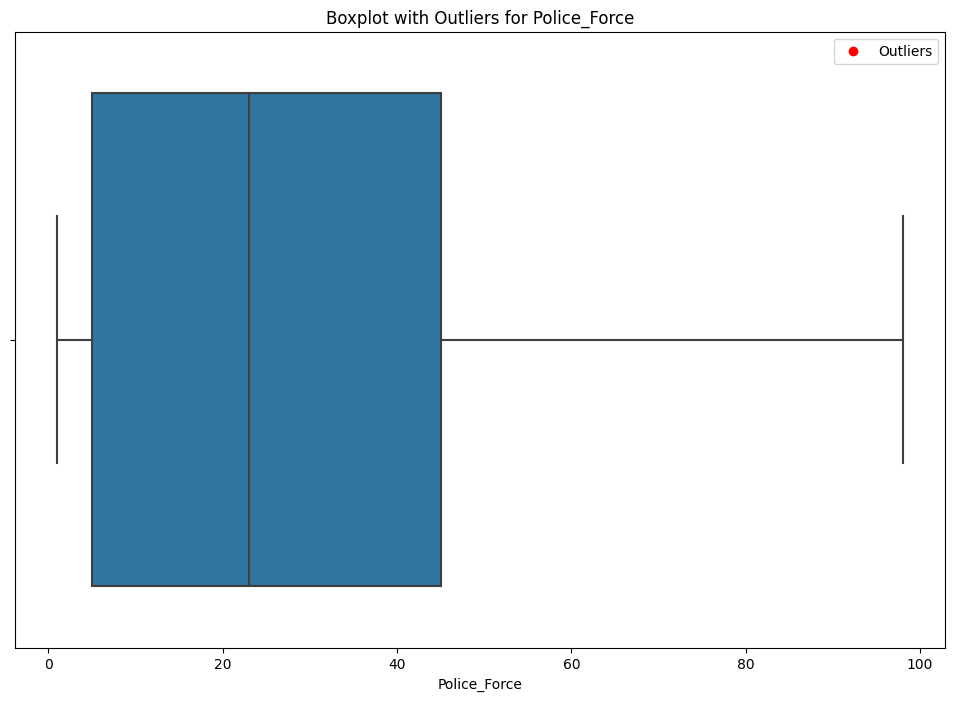

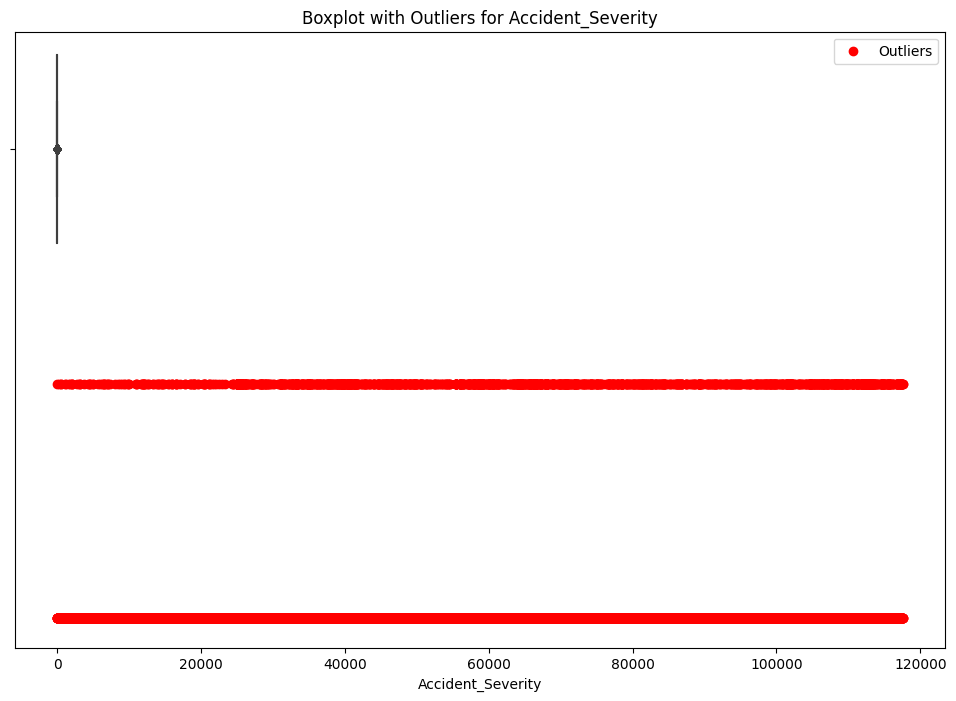

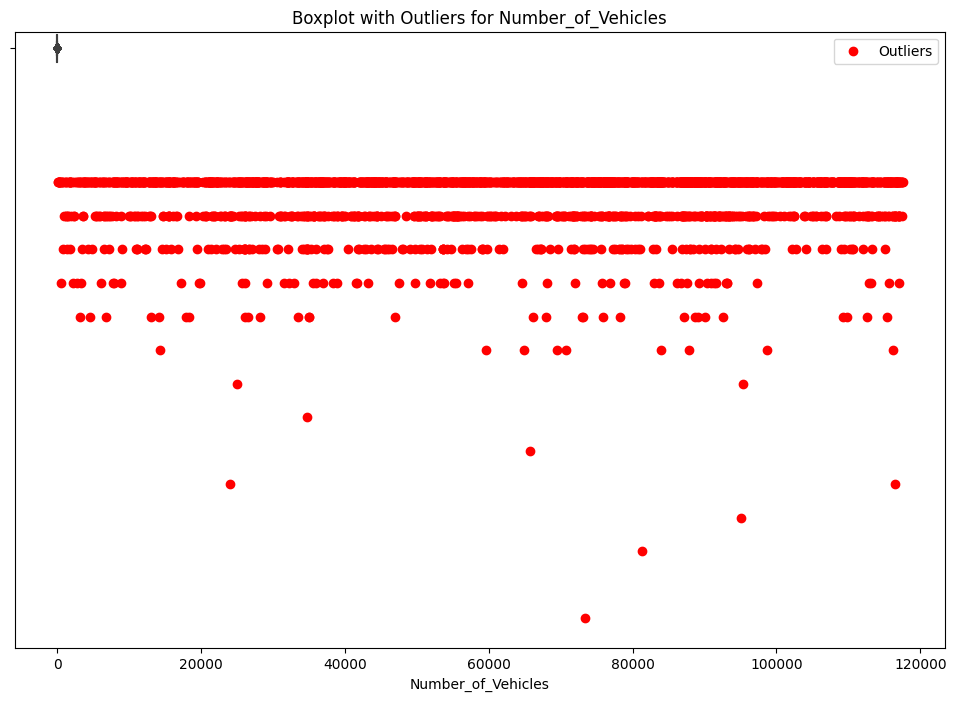

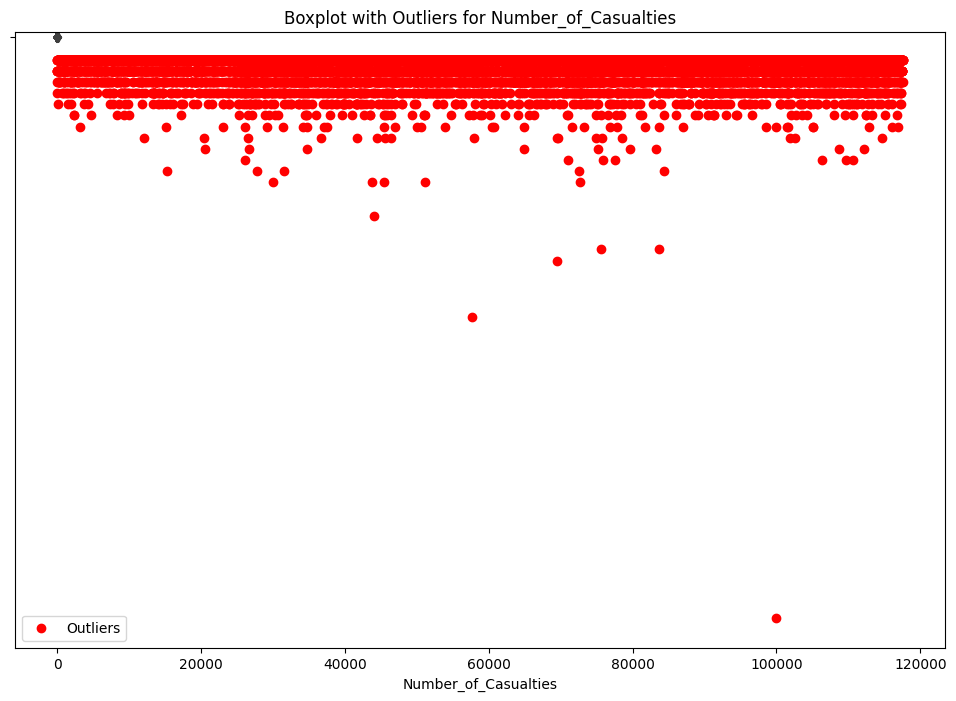

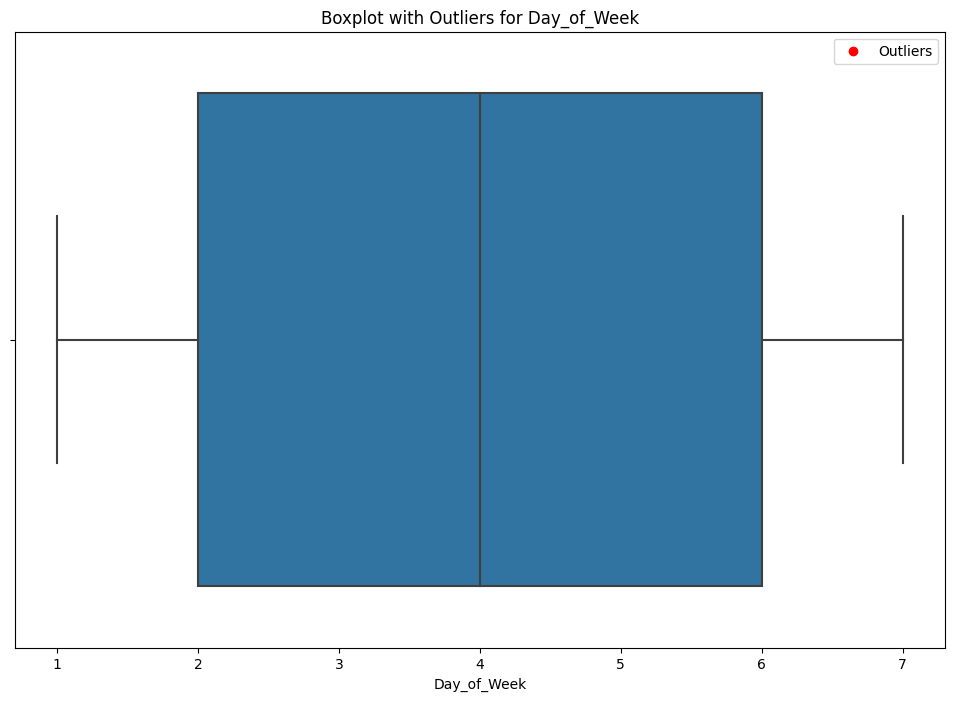

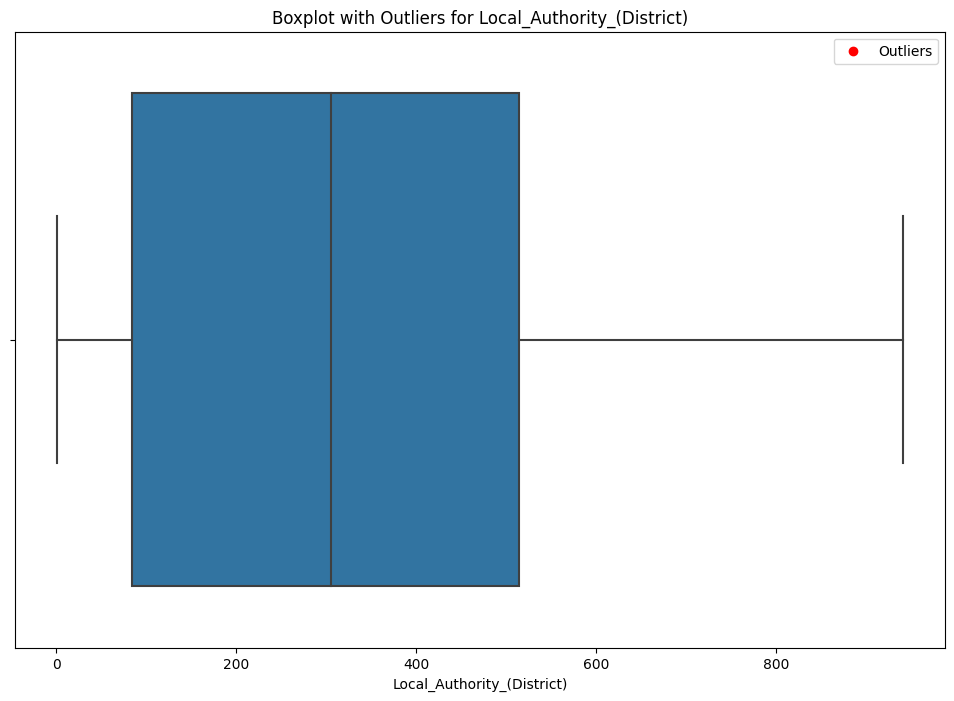

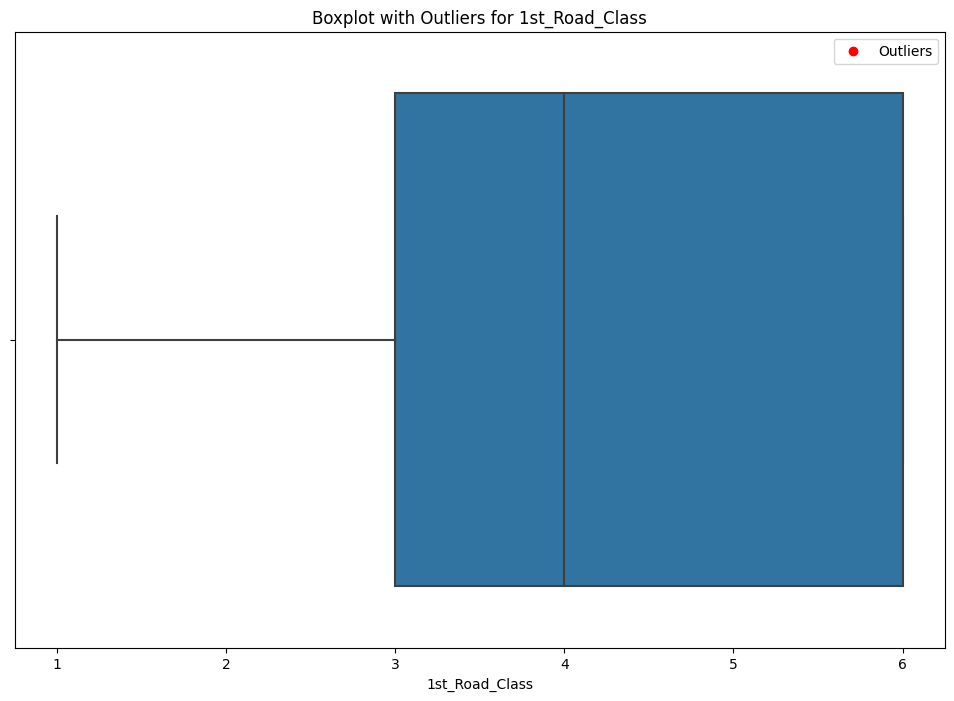

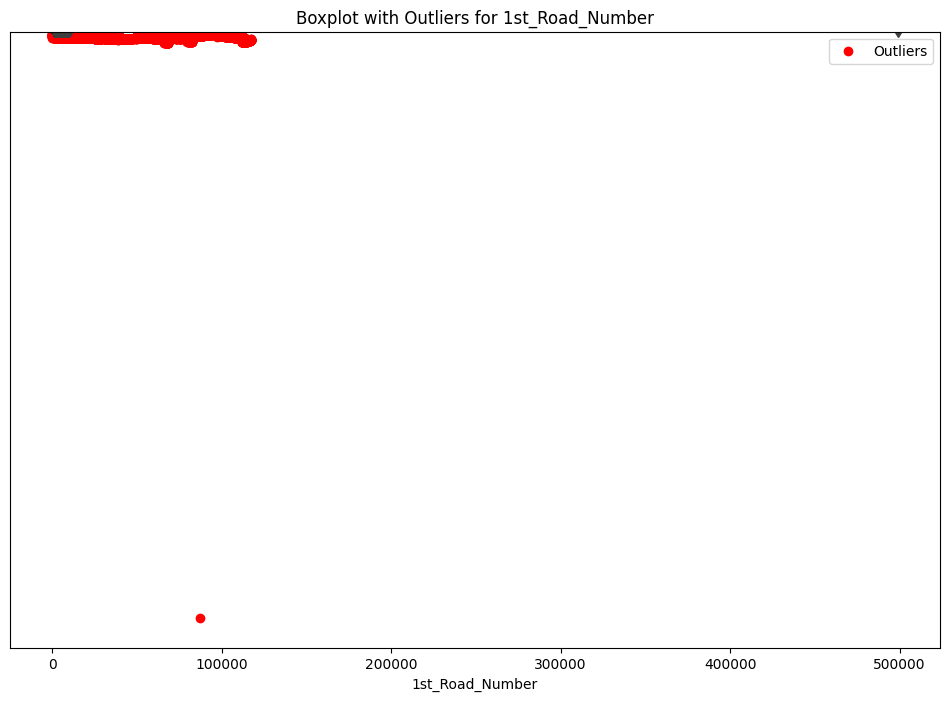

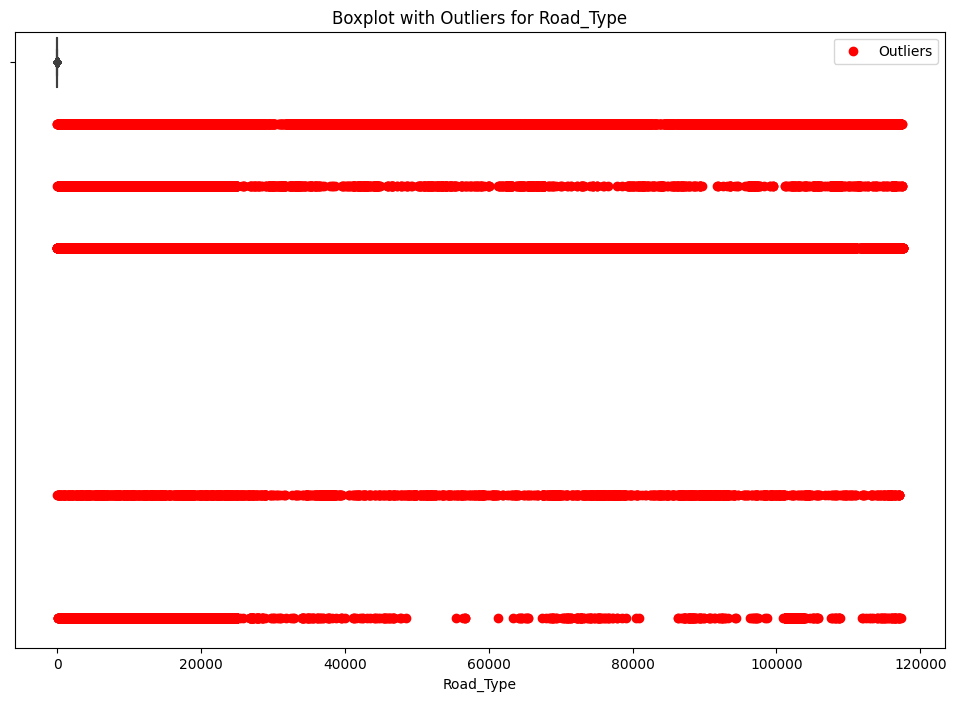

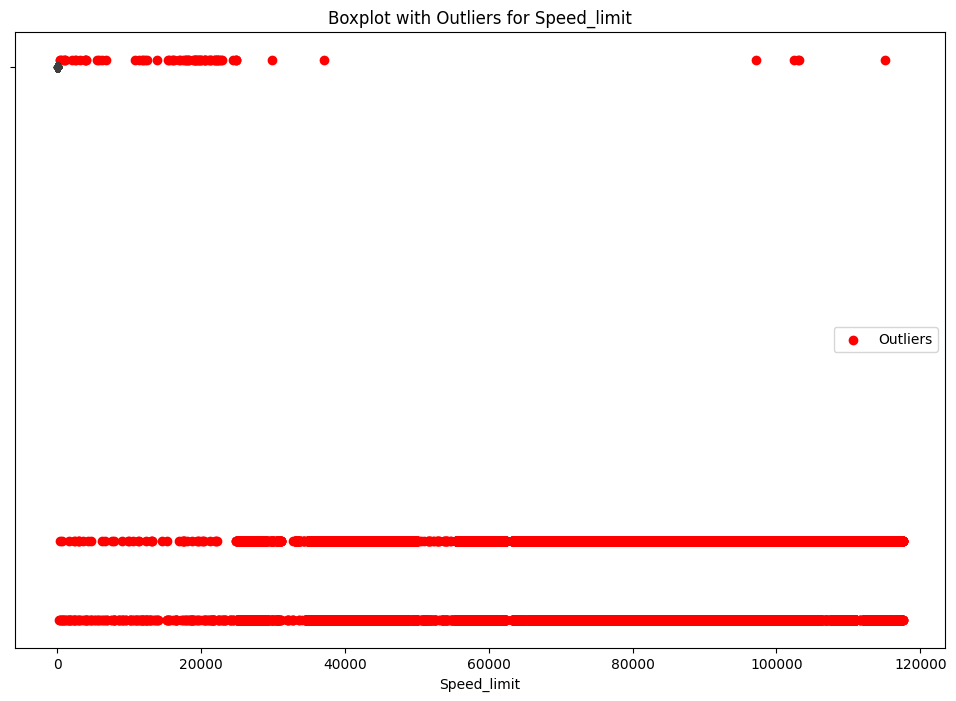

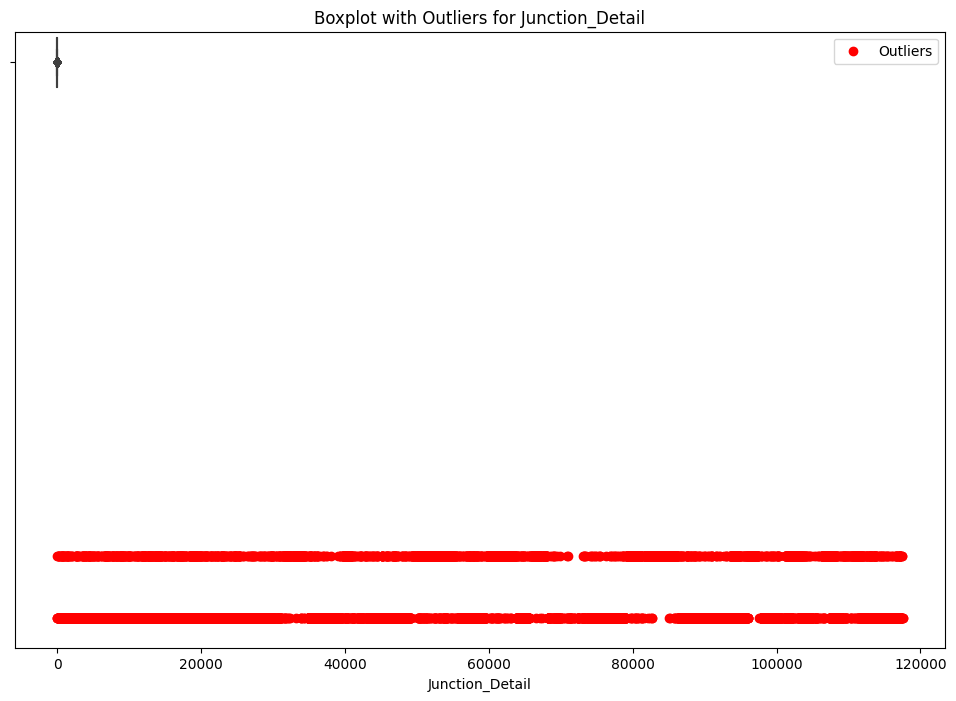

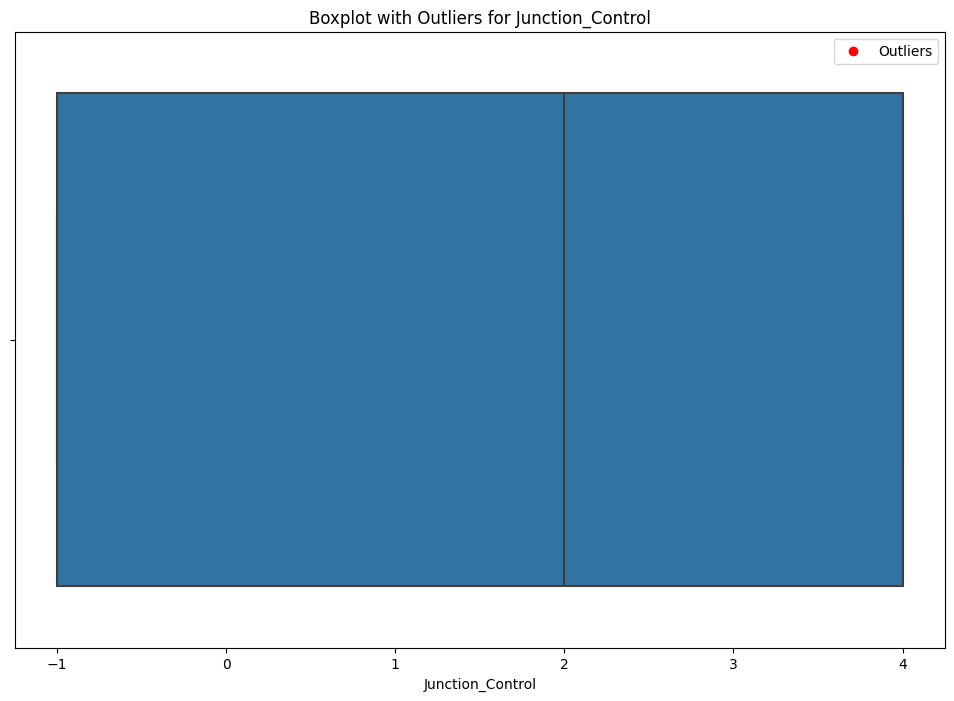

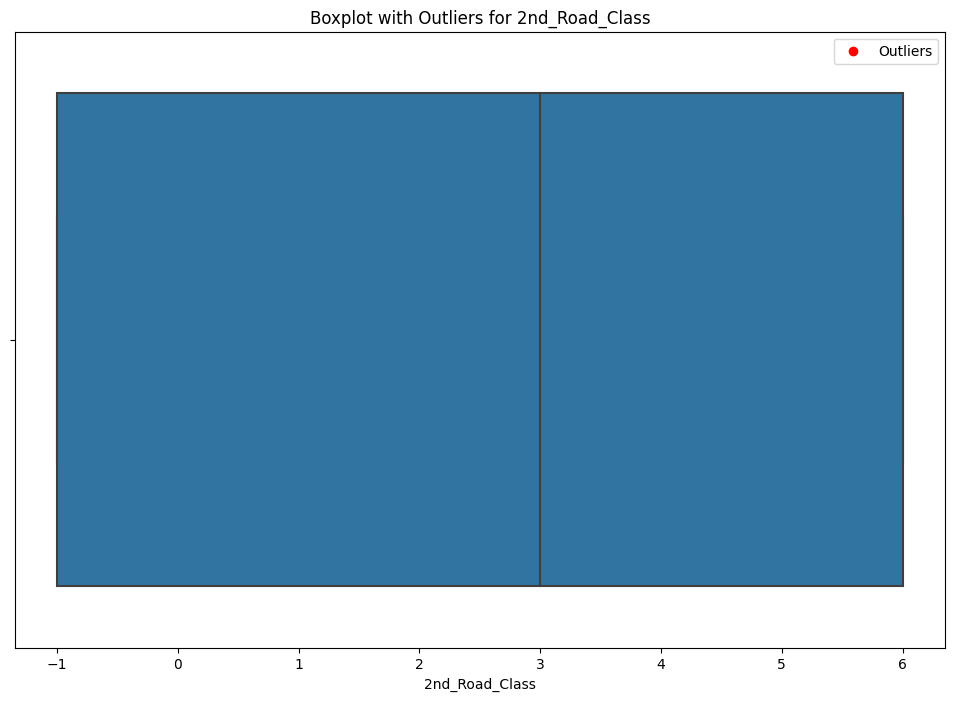

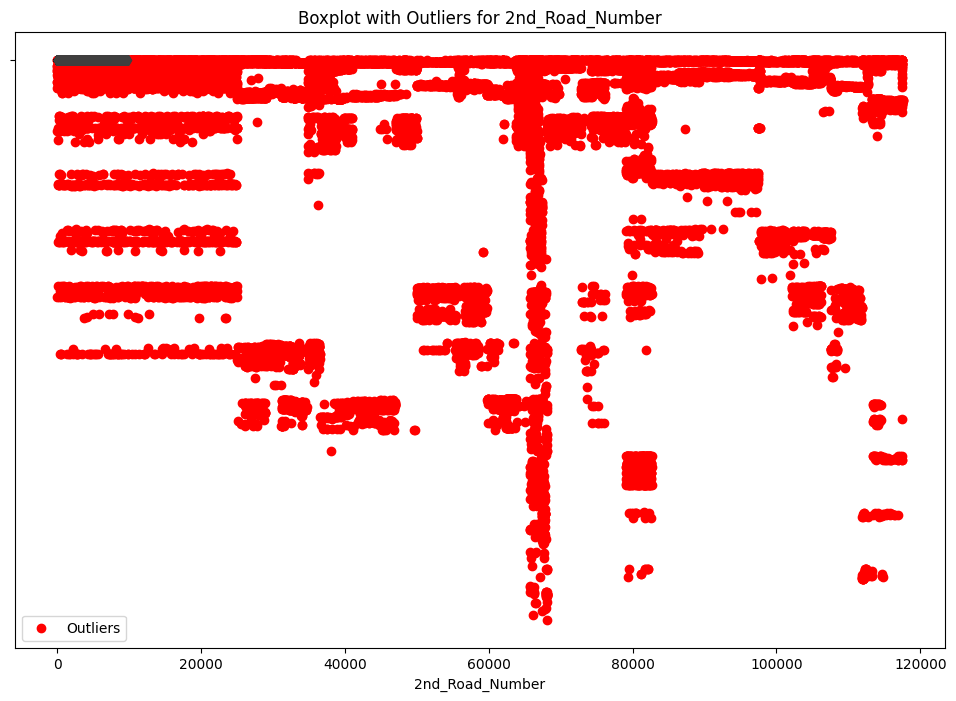

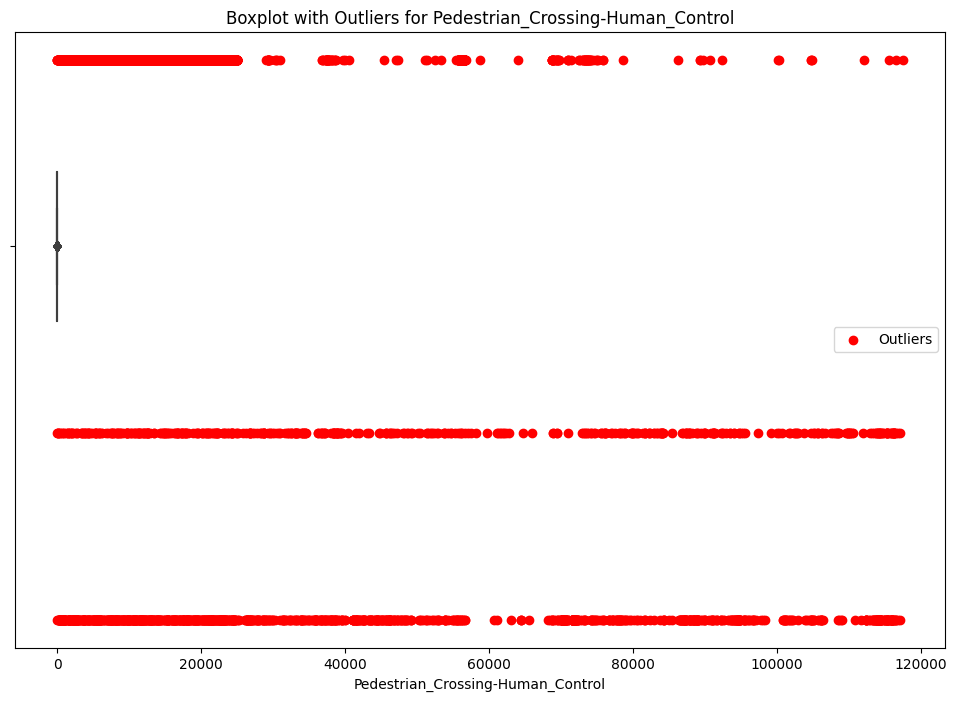

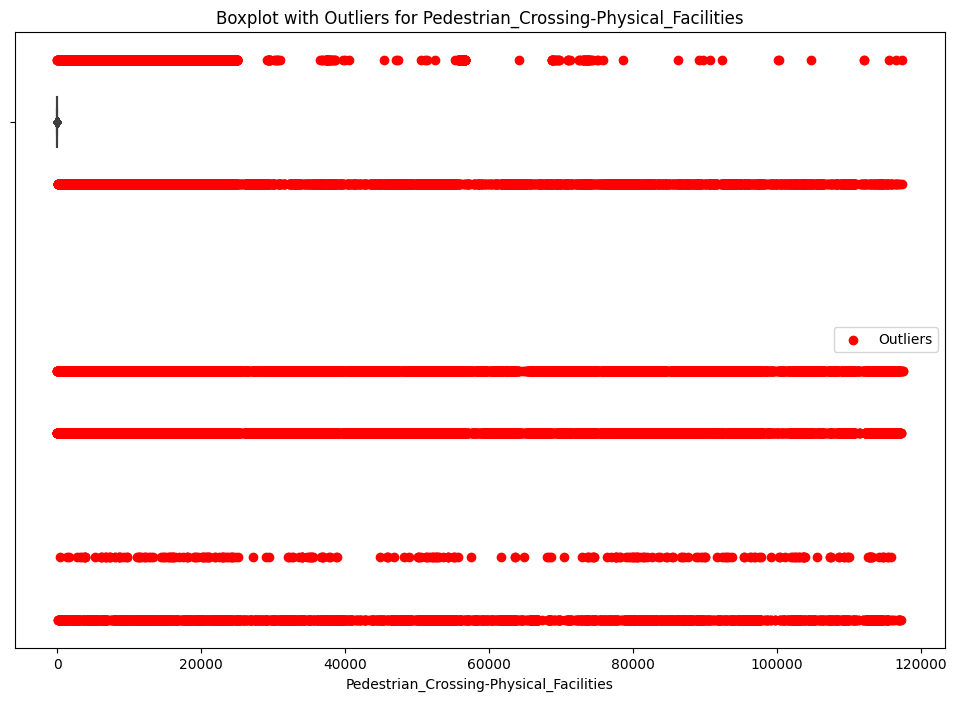

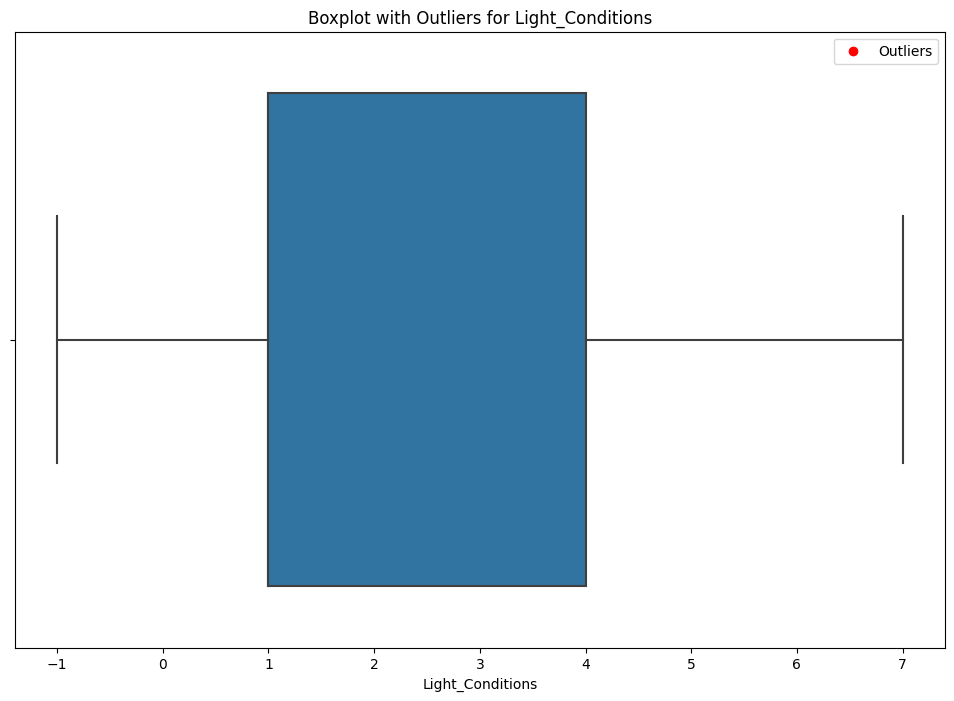

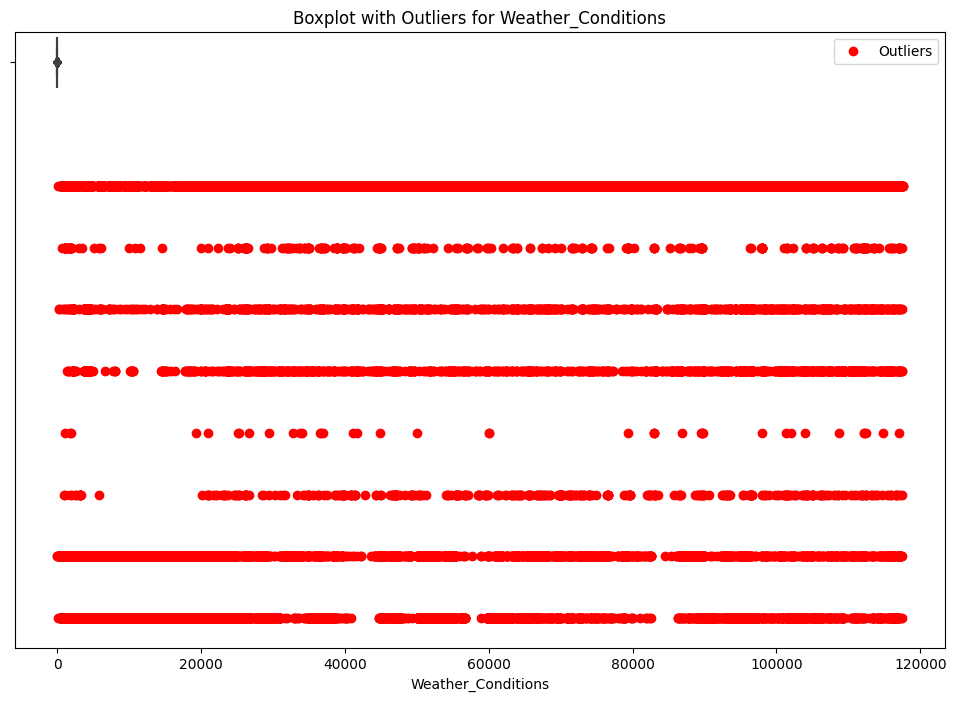

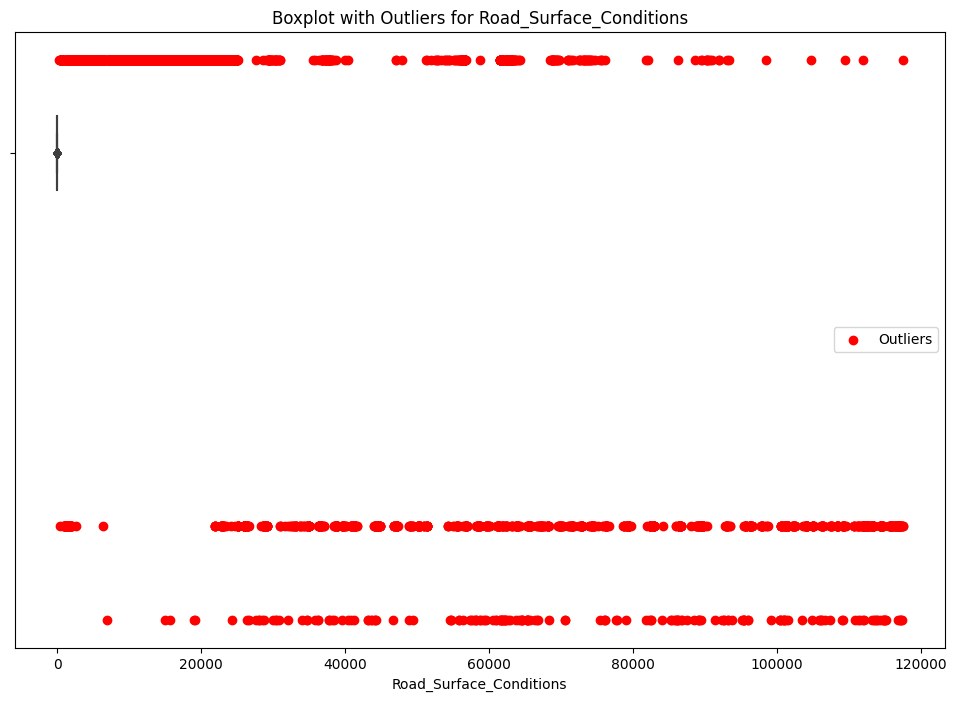

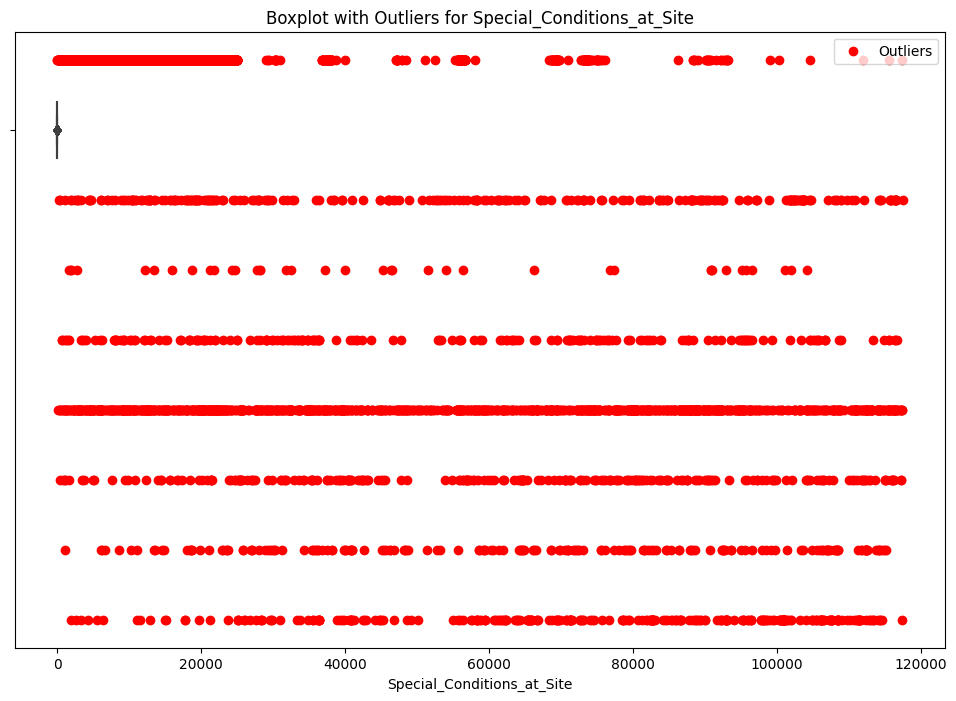

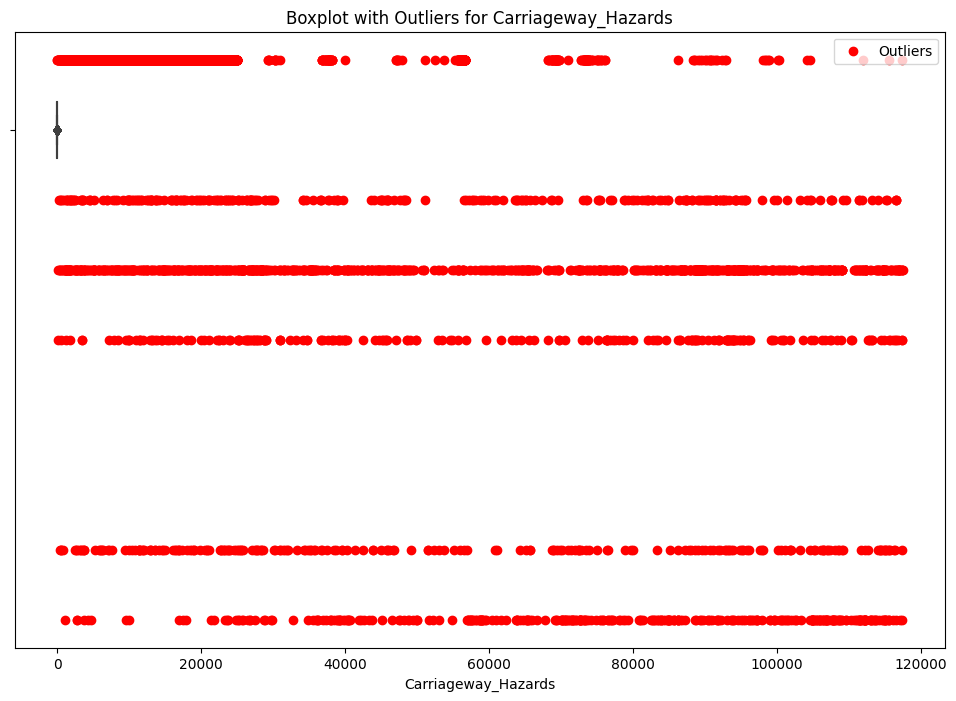

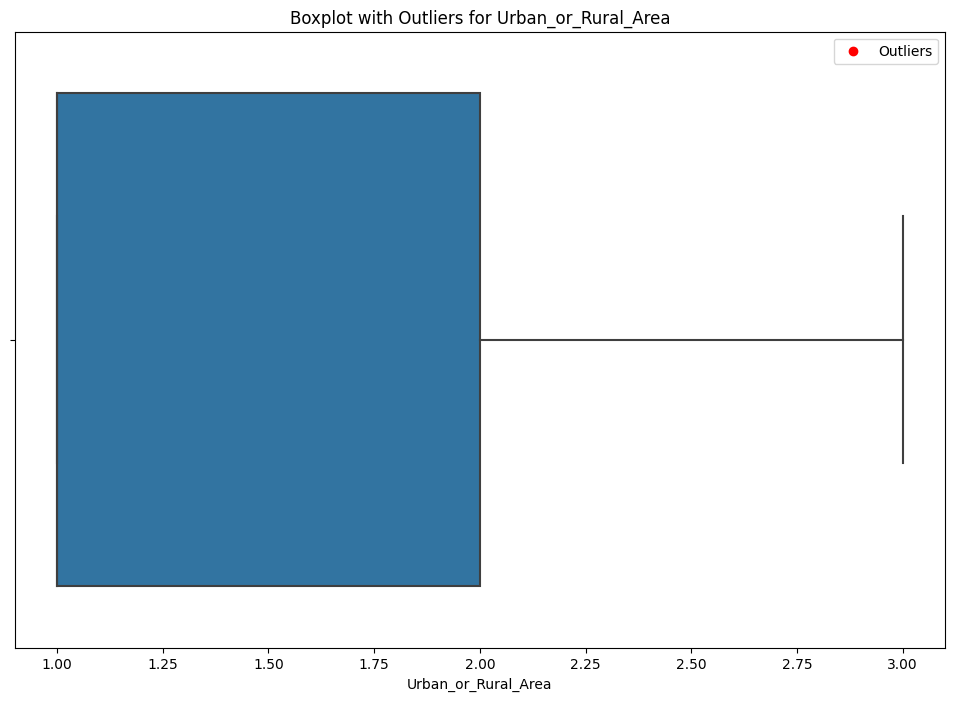

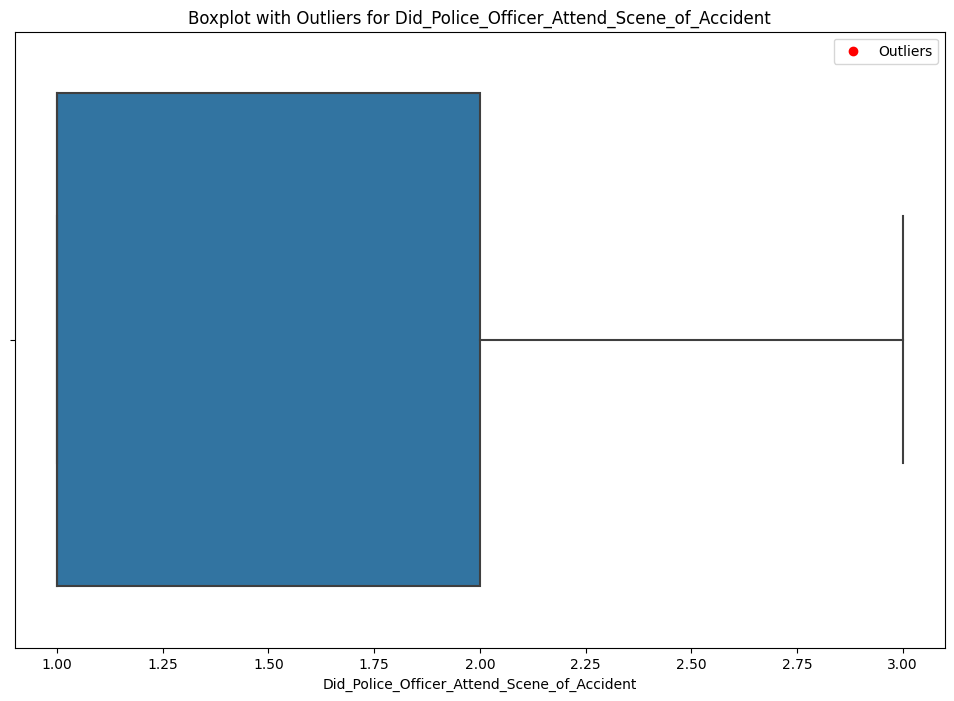

In [25]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=df[column])
    outliers = df[column][~((df[column] >= df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25)))&(df[column] <= df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))))]

    plt.scatter(x=outliers.index, y=outliers, color='red', marker='o', label='Outliers')

    plt.title(f'Boxplot with Outliers for {column}')
    plt.xlabel(column)
    plt.legend()
    plt.show()


**OBSERVATIONS**

18 columns in the dataset have Outliers

**Correlation Matrix**

<ipython-input-26-362ad3e9ec25>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


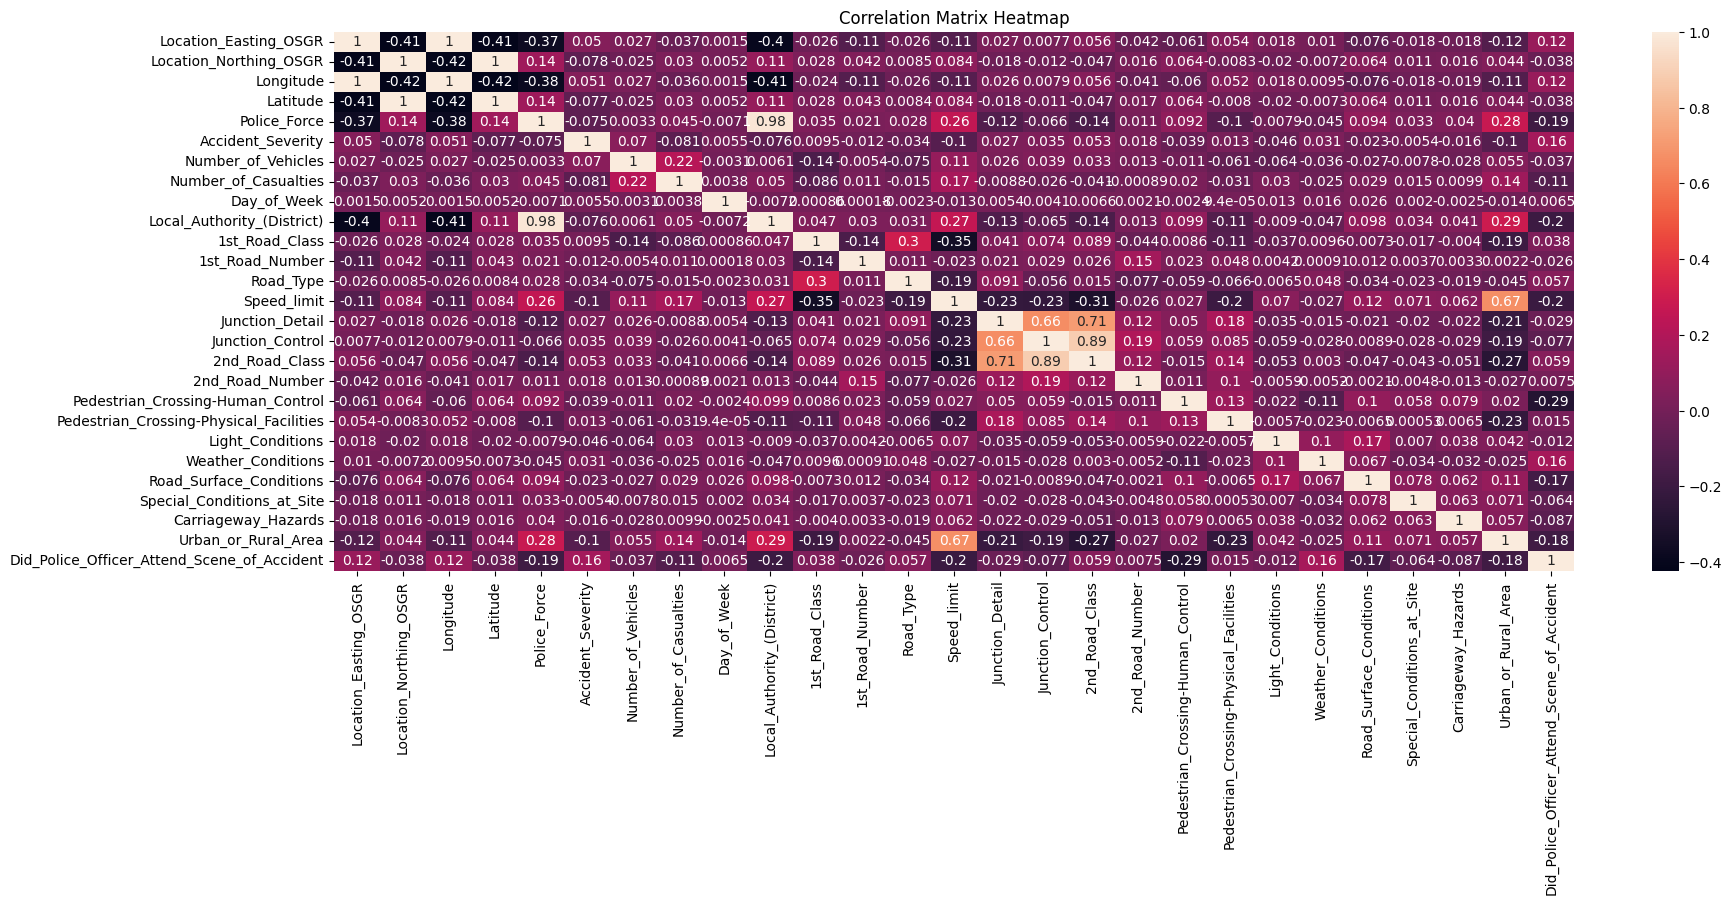

In [26]:
# Correlation matrix heatmap
plt.figure(figsize=(20,7))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Visualize the distribution of columns having more correlation**

Here we have considered correlation treshold as 0.7

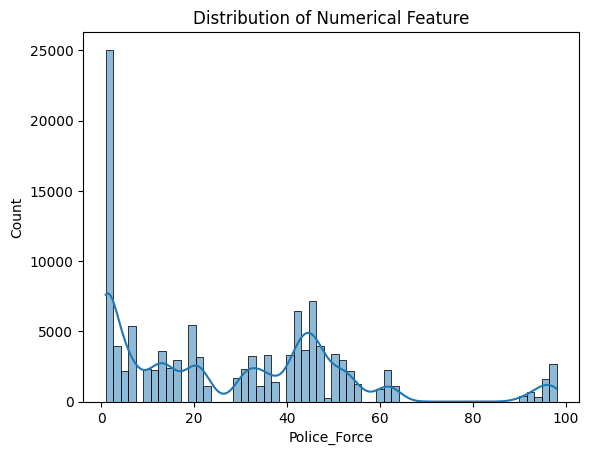

In [27]:
sns.histplot(df['Police_Force'], kde=True)
plt.title('Distribution of Numerical Feature')
plt.show()


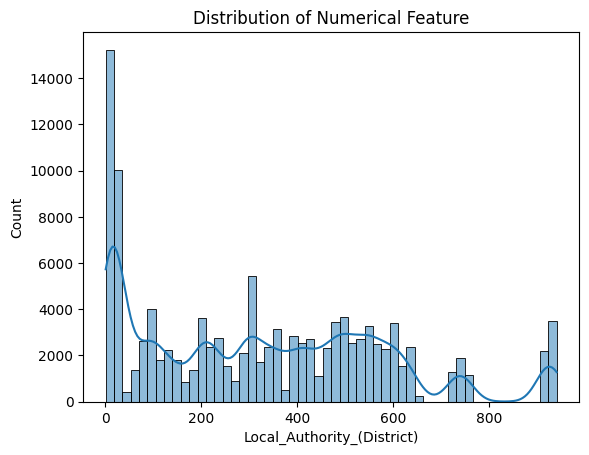

In [28]:
sns.histplot(df['Local_Authority_(District)'], kde=True)
plt.title('Distribution of Numerical Feature')
plt.show()


**OBSERVATIONS**

**Here police force column and local_authority_(district) column have high correlation of 0.89**

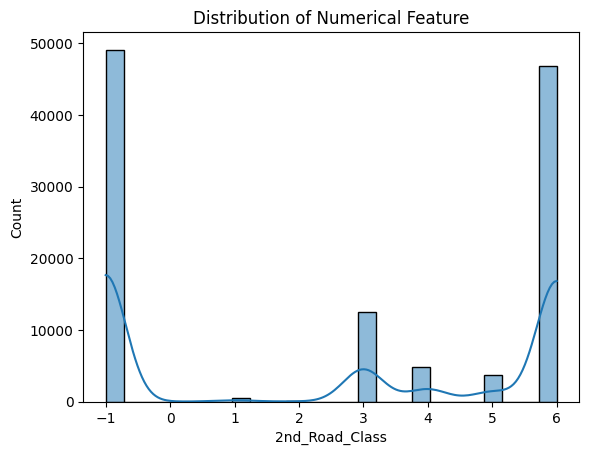

In [29]:
sns.histplot(df['2nd_Road_Class'], kde=True)
plt.title('Distribution of Numerical Feature')
plt.show()


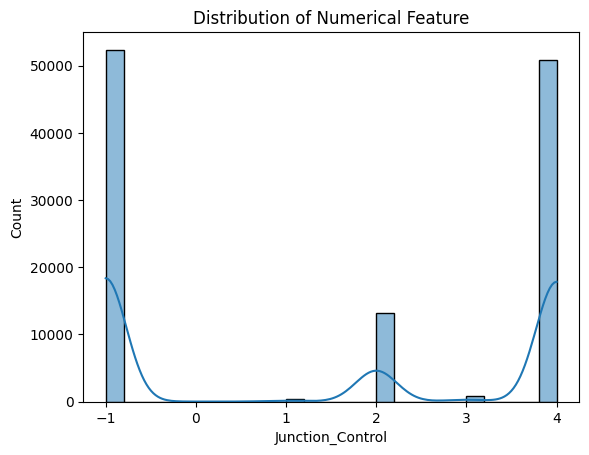

In [30]:
sns.histplot(df['Junction_Control'], kde=True)
plt.title('Distribution of Numerical Feature')
plt.show()

**OBSERVATIONS**

**Here junction control and 2nd_road_class column have correlation of 0.71**